# Bank Marketing Term Deposit Prediction

This project analyzes the Bank Marketing dataset to predict whether a client will subscribe to a term deposit. The workflow includes data loading, preprocessing, exploratory data analysis, feature engineering, and building machine learning models to classify client responses. The dataset contains information about direct marketing campaigns of a Portuguese banking institution, including client and campaign attributes. The goal is to build a predictive model to assist the bank in targeting potential clients more effectively.

## About the Dataset

The Bank Marketing dataset contains information collected from direct marketing campaigns of a Portuguese banking institution. The data includes client attributes (such as age, job, marital status), campaign details (number of contacts, previous outcomes), and economic indicators. The target variable is whether the client subscribed to a term deposit ('yes' or 'no').

## Project Workflow

1. Data Loading and Exploration
2. Data Cleaning and Preprocessing
3. Exploratory Data Analysis (EDA)
4. Feature Engineering
5. Model Building and Evaluation
6. Insights and Conclusions

This notebook will guide you through each step, providing code, visualizations, and explanations to help understand the process and results.

## Input and Output Variables

### Input Variables (Features)
- **age**: Age of the client (numeric)
- **job**: Type of job (categorical)
- **marital**: Marital status (categorical)
- **education**: Education level (categorical)
- **default**: Has credit in default? (categorical)
- **housing**: Has housing loan? (categorical)
- **loan**: Has personal loan? (categorical)
- **contact**: Contact communication type (categorical)
- **month**: Last contact month of year (categorical)
- **day_of_week**: Last contact day of the week (categorical)
- **duration**: Last contact duration, in seconds (numeric)
- **campaign**: Number of contacts performed during this campaign (numeric)
- **pdays**: Days since last contact from a previous campaign (numeric)
- **previous**: Number of contacts before this campaign (numeric)
- **poutcome**: Outcome of the previous marketing campaign (categorical)
- **emp.var.rate**: Employment variation rate (numeric)
- **cons.price.idx**: Consumer price index (numeric)
- **cons.conf.idx**: Consumer confidence index (numeric)
- **euribor3m**: Euribor 3 month rate (numeric)
- **nr.employed**: Number of employees (numeric)

### Output Variable (Target)
- **y**: Has the client subscribed a term deposit? (binary: 'yes', 'no')

In [2]:
# Load libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
data = pd.read_csv(r"C:\Users\Jayesh Mahajan\Desktop\bank_project\bank-additional\bank-additional\bank-additional-full.csv", sep=';')
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Drop duration column dis attribute highly affects the output target (e.g., if duration=0 then y='no').
Yet, the duration is not non before a call is performed. Also, after the end of the call y is obviously non.Thus, dis input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [4]:
data=pd.read_csv(r"C:\Users\Jayesh Mahajan\Desktop\bank_project\bank-additional\bank-additional\bank-additional-full.csv",sep=';')
data=data.drop(['duration'],axis=1)
print(data.shape)
data.head()

(41188, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


# 2. Data Exploration

In [6]:
#Information of data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [7]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# 1.1. Knowing the categorical variables

In [8]:
# knowing the job categorical variables
data["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [9]:
# knowing the age categorical variables
data["age"].unique()

array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
       49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
       28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
       77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
       74, 17, 87, 91, 86, 98, 94, 84, 92, 89])

In [10]:

data["marital"].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [11]:
data["education"].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

We first start the exploratory analysis of the categorical variables and see what are the categories and are there any missing values for these categories. Here, we used the seaborn package to create the bar graphs below.

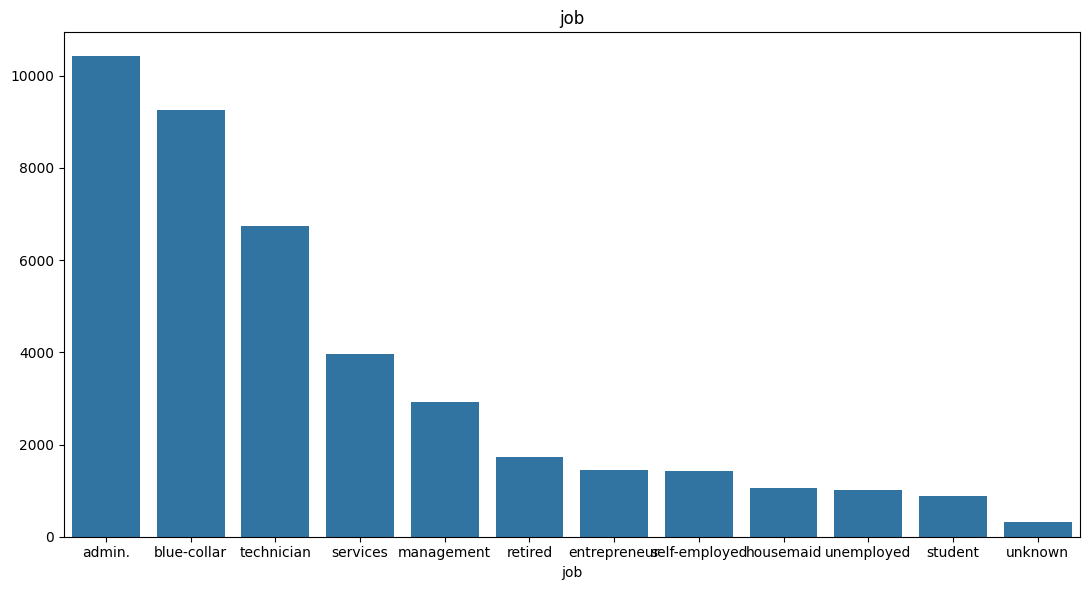

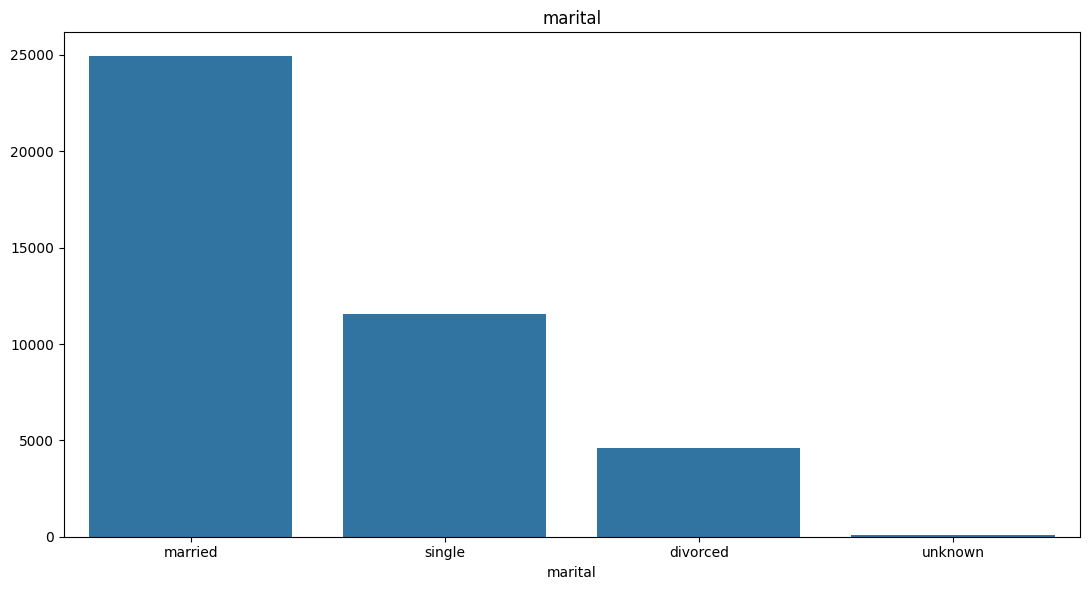

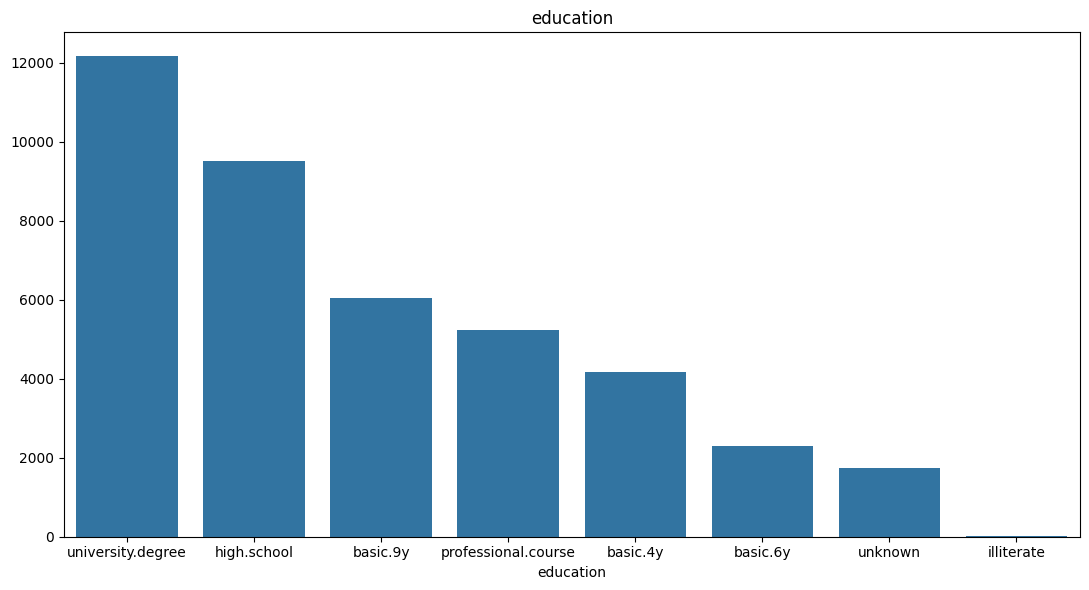

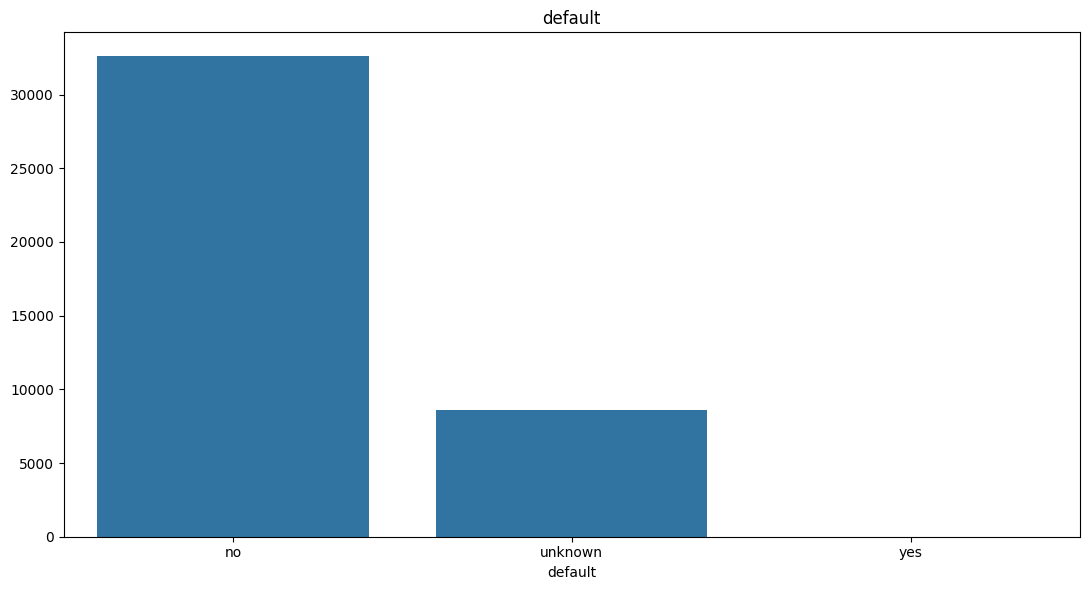

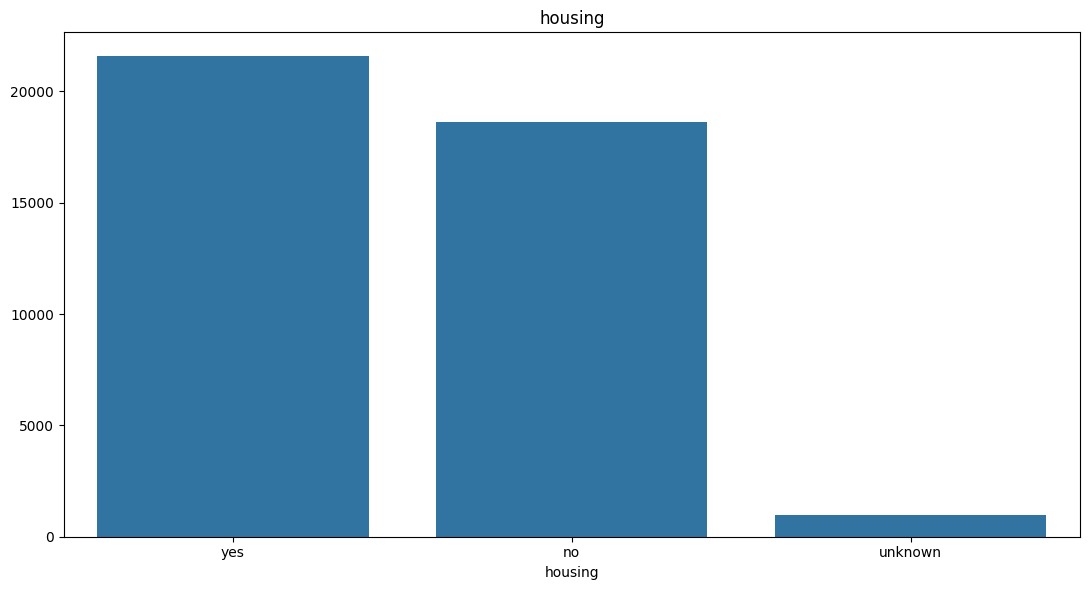

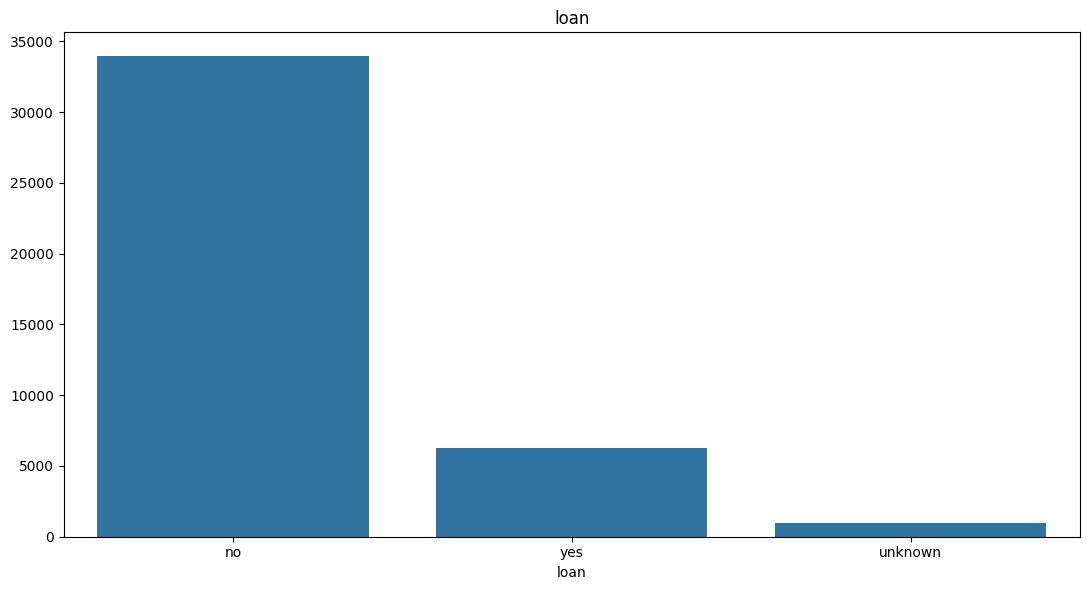

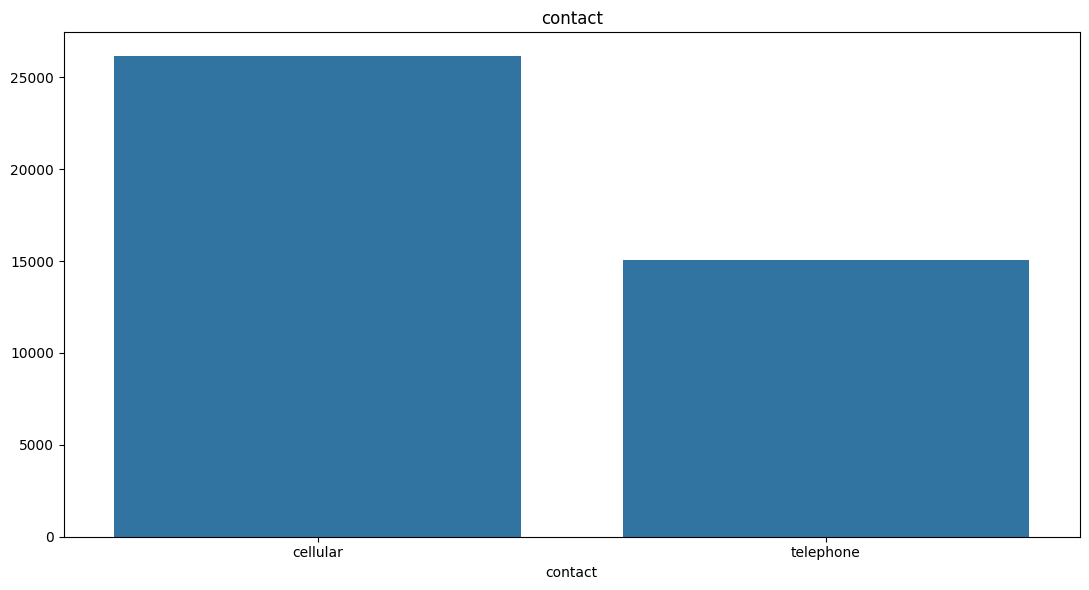

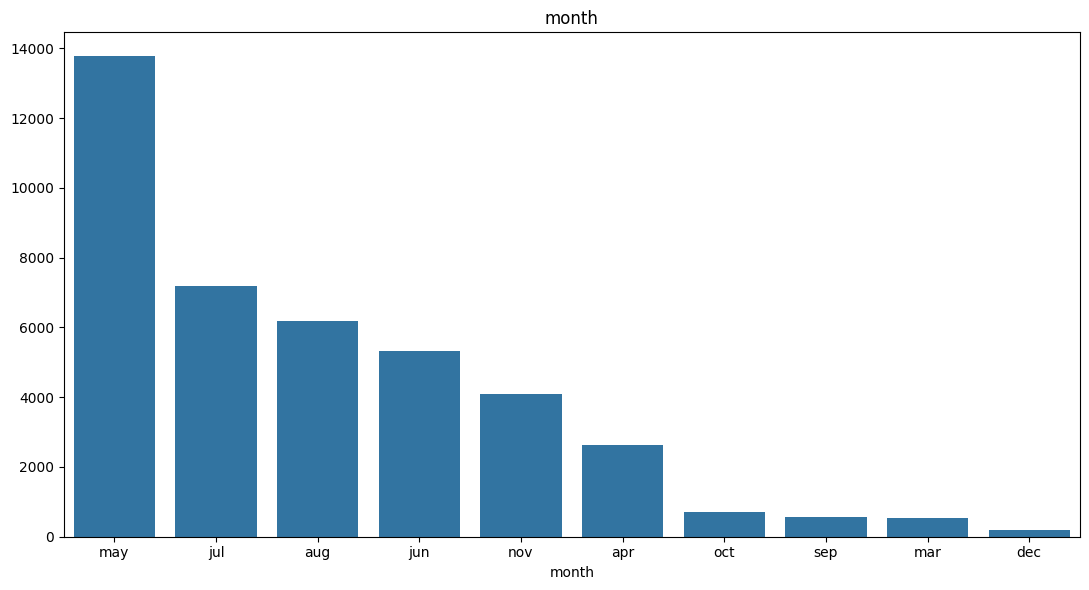

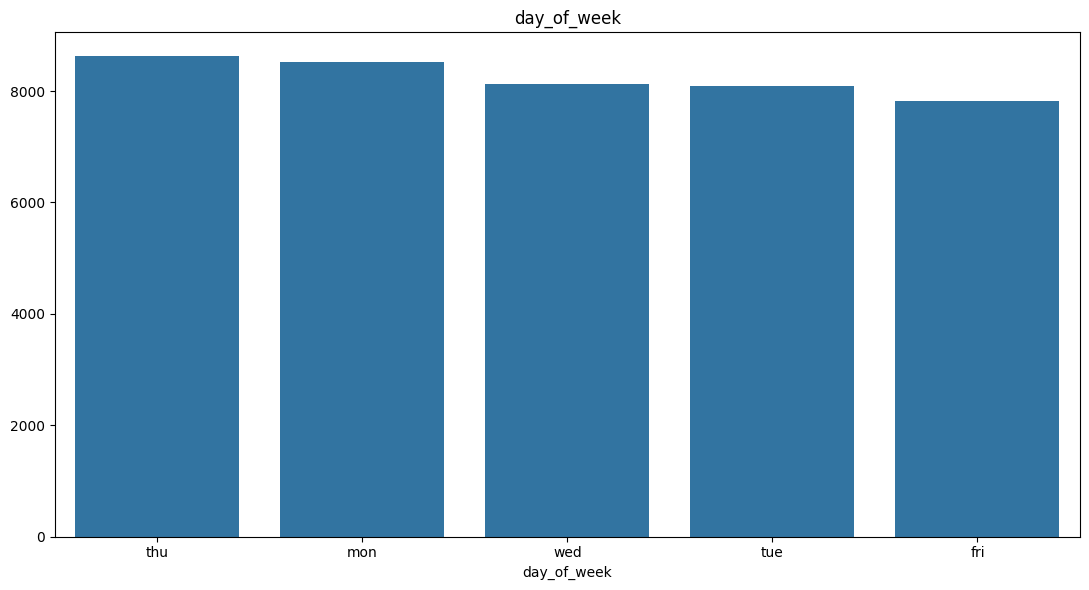

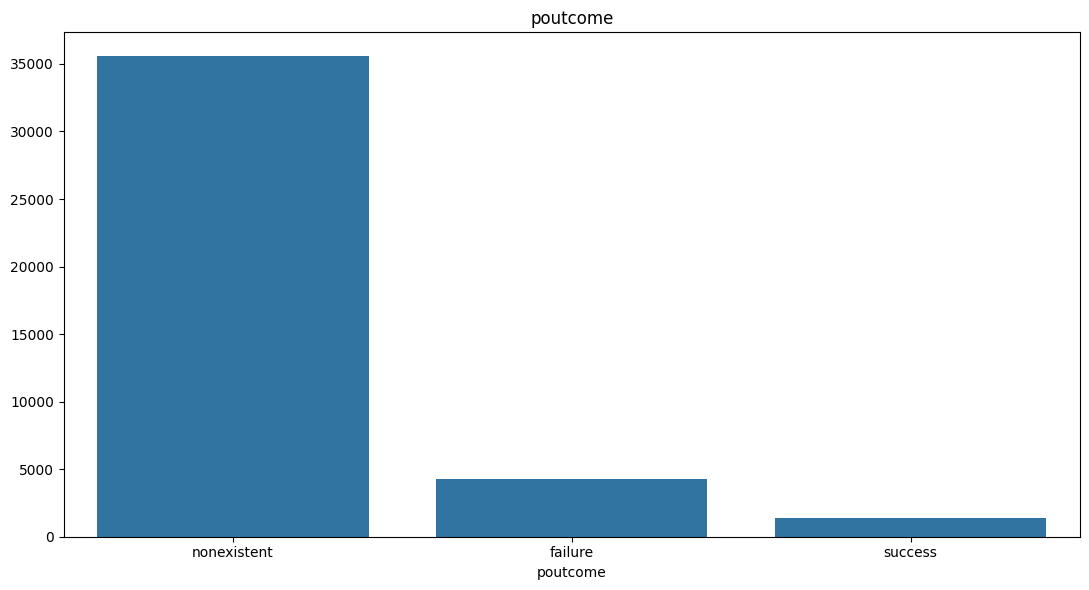

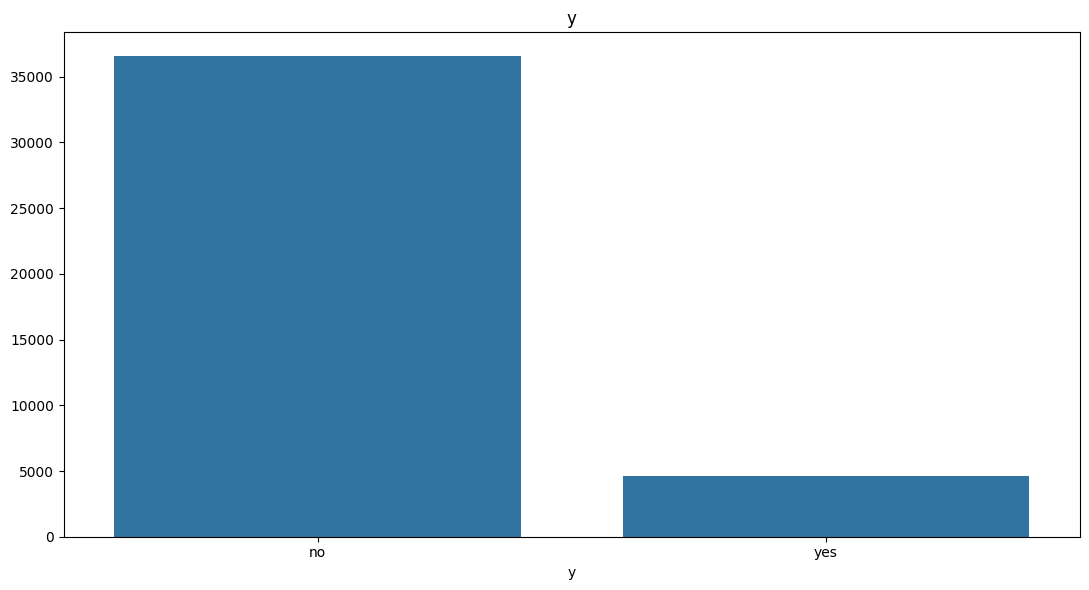

In [12]:
# we will not emp.var.rate ,cons.price.idx etc into consideration due to they are all single value.here we are taking only categorial value into consideration.
categori=['job', 'marital', 'education', 'default','housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome','y']
for col in categori:
    plt.figure(figsize=(11,6))
    sns.barplot(x=data[col].value_counts().index, y=data[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show()

# Input Categorical feature Observation


1) Job - More Job types are Admin , Technician and blue-collor and it means bank targeting high salaried people.

2)Marital - more people of type married - (#To Do - Check the target value distribution for high salaried married people)
    
3) Education - more count in university.degree people . of course High salaried people should have university degree 
 expected. And illiterate count is very less.
    
4) default - most people have no credit default ,which means they can be approched .

5) housing - we must give more importance to people who have not taken any housing loan.

6)loan - we must give more importance to people who have not taken any personnel loan.

7) month - Seems May is busy season in Portuguese

8) Day_of_week - Seems every day is busy but not on weekends.

9) p_outcome -outcome of the previous marketing campaign- Success is small rate. (#To DO - Check how success correlates without put parameter ?)

# Categorize variables correlated with Target Variables

In [13]:
#Check How Categorize variables correlated with Target Variables and How it impacted.
from scipy import stats

In [14]:
#Check How Job Type correlated with Target Variable
data.groupby(['job','y']).y.count()

#Admin are more interested in Term Deposit.

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

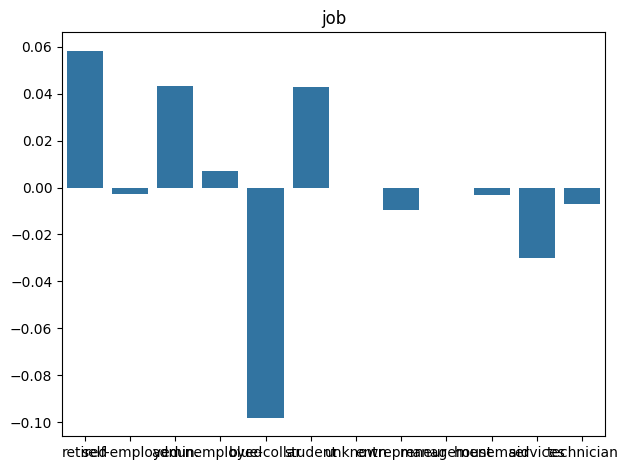

In [15]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'job'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
# angelaxuan/dna-brown-bag-session-bank-marketing-campaign
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(x=all_index, y=all_counts)  
plt.title(feature_name)
plt.tight_layout()

In [16]:
data.groupby(['marital','y']).y.count()
#married people are more interested in Term Deposit

marital   y  
divorced  no      4136
          yes      476
married   no     22396
          yes     2532
single    no      9948
          yes     1620
unknown   no        68
          yes       12
Name: y, dtype: int64

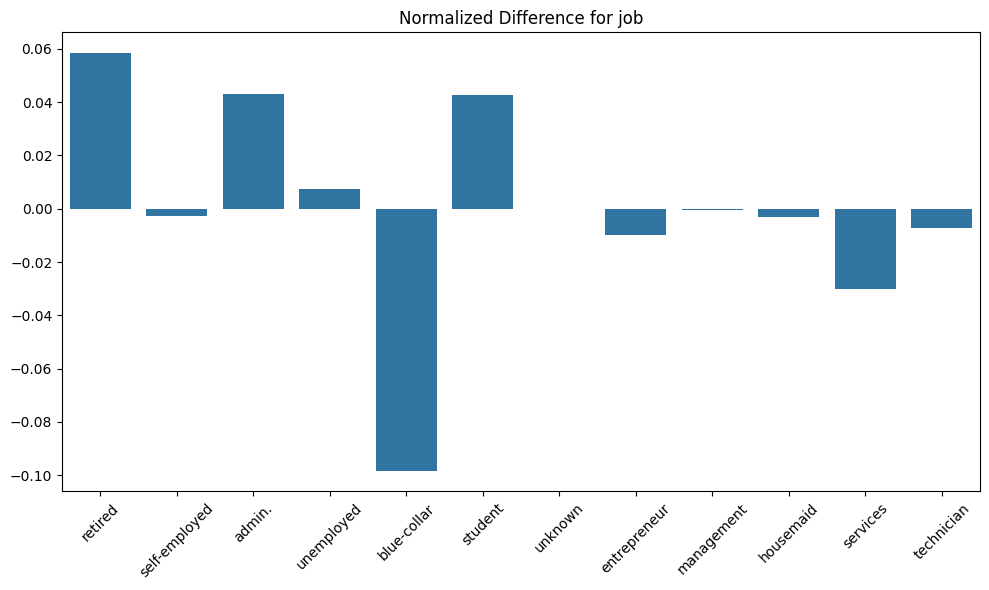

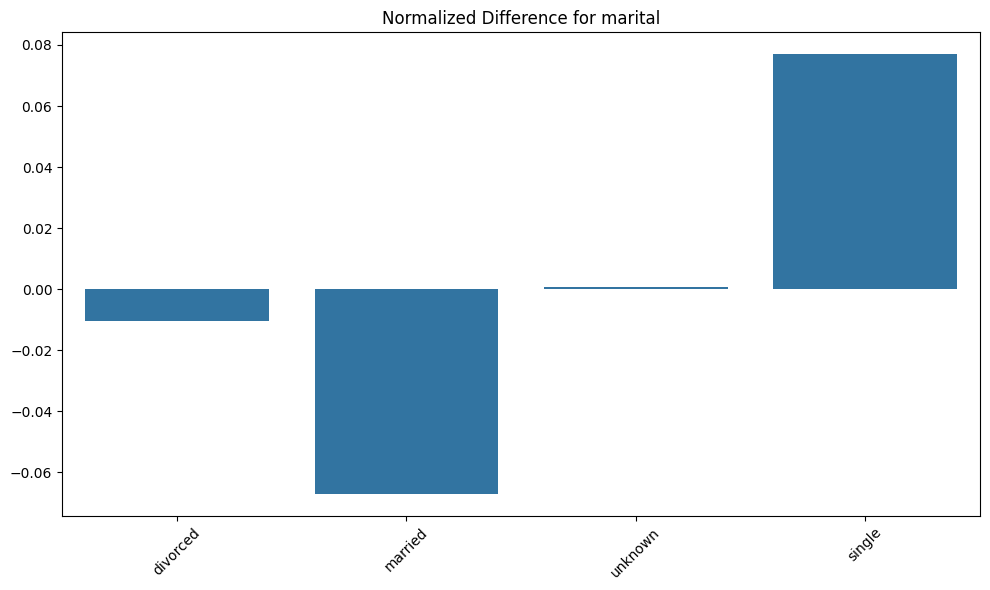

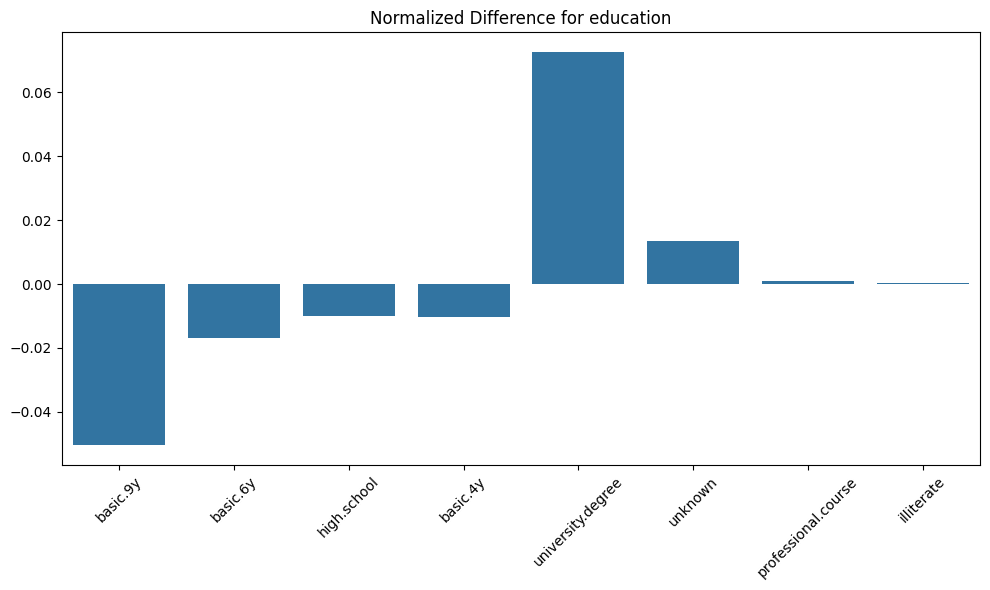

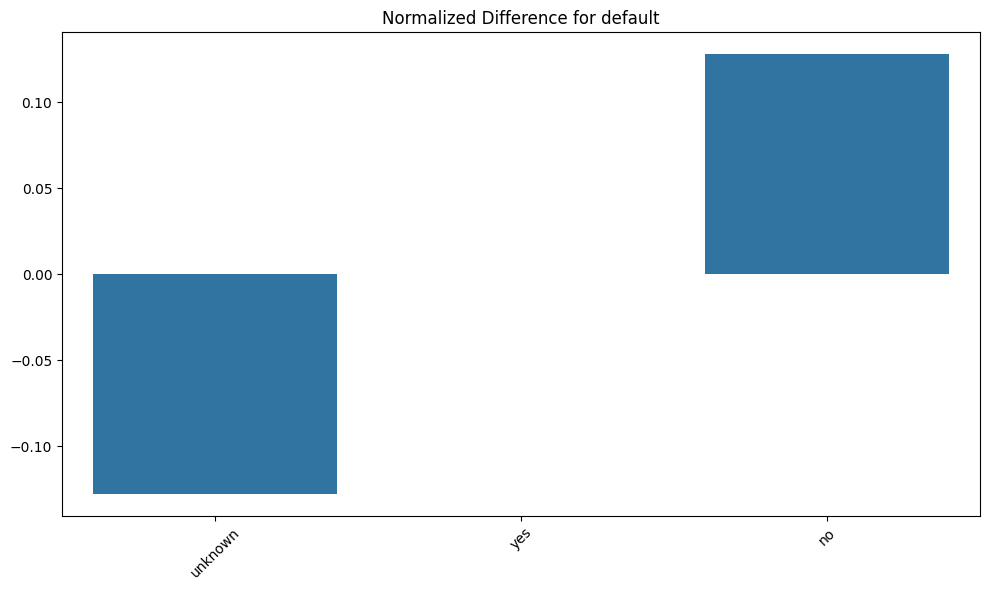

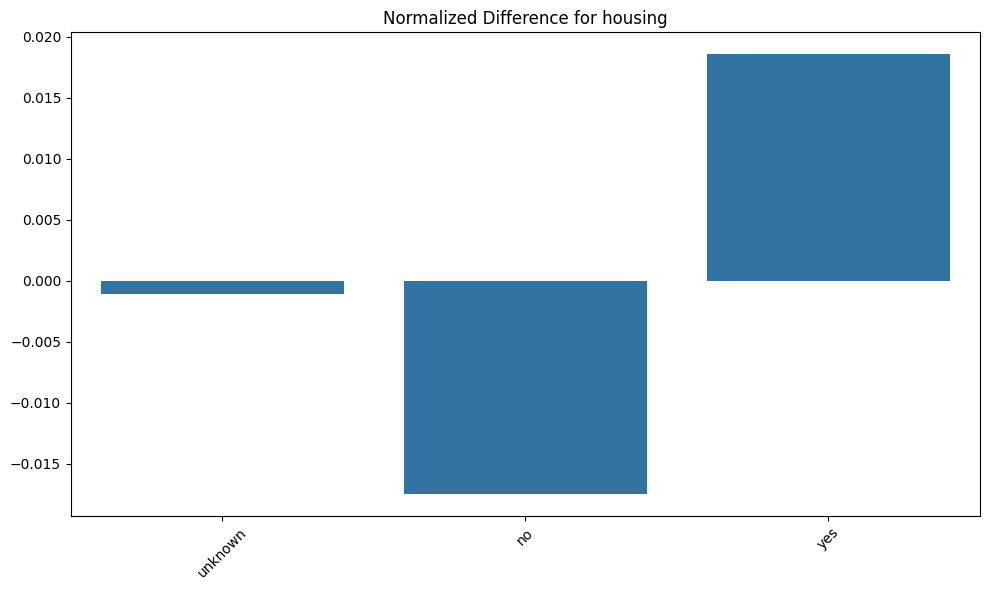

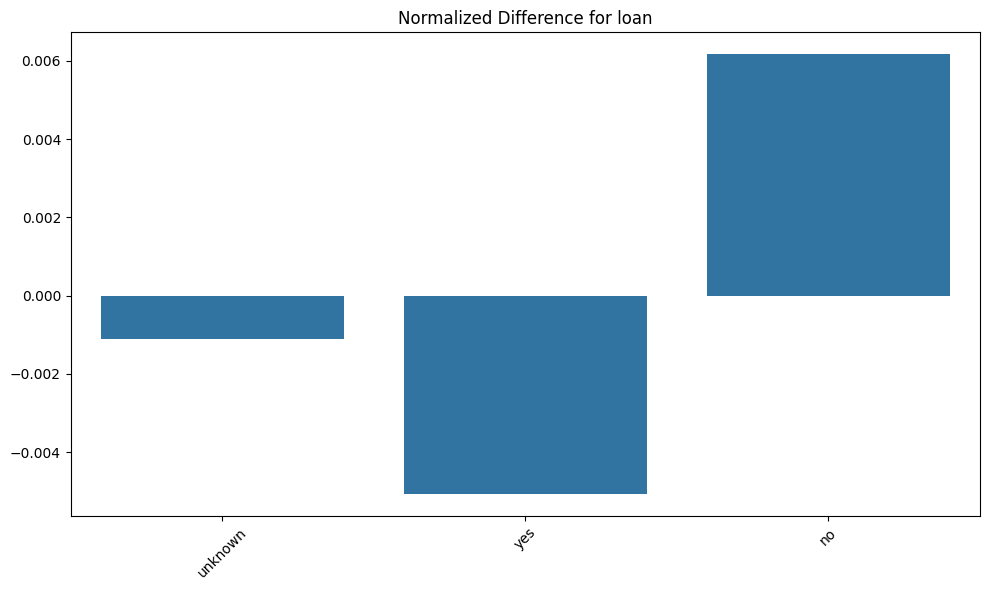

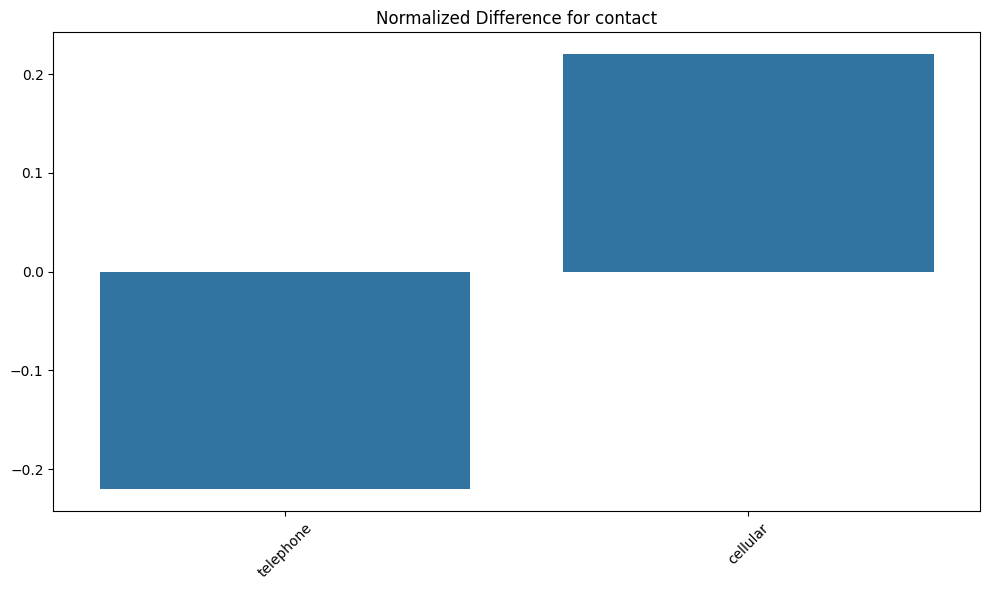

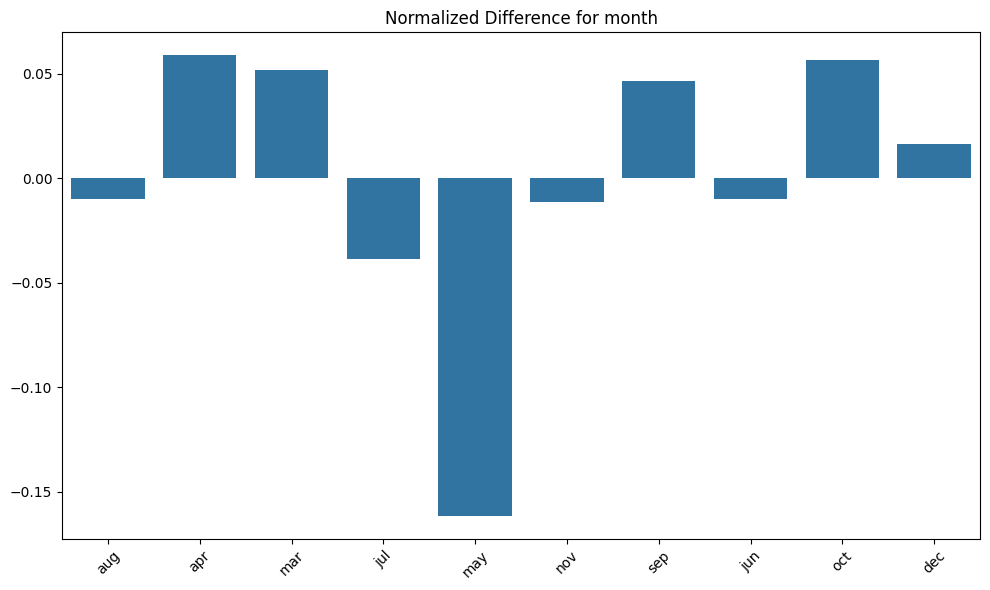

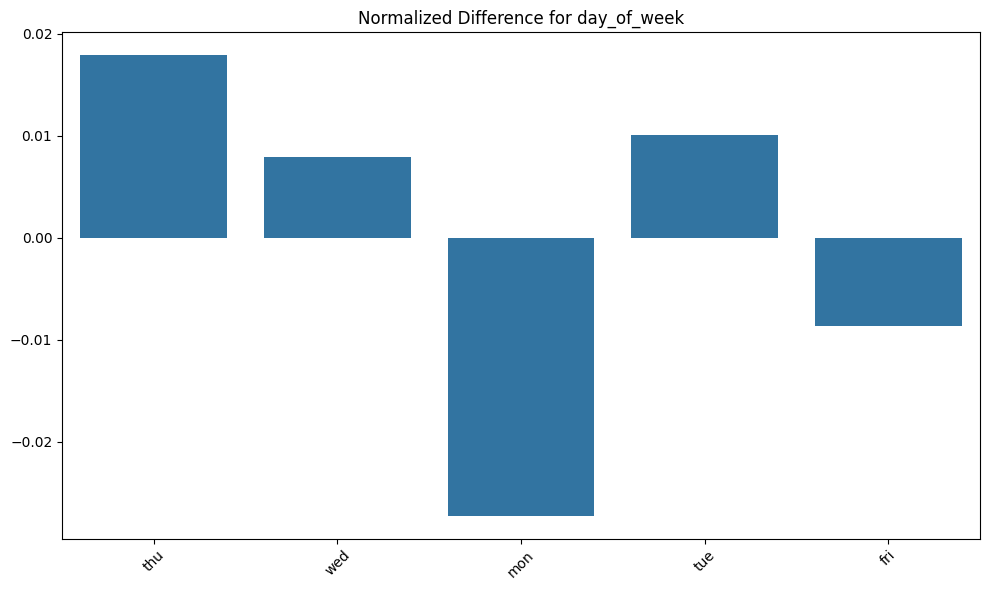

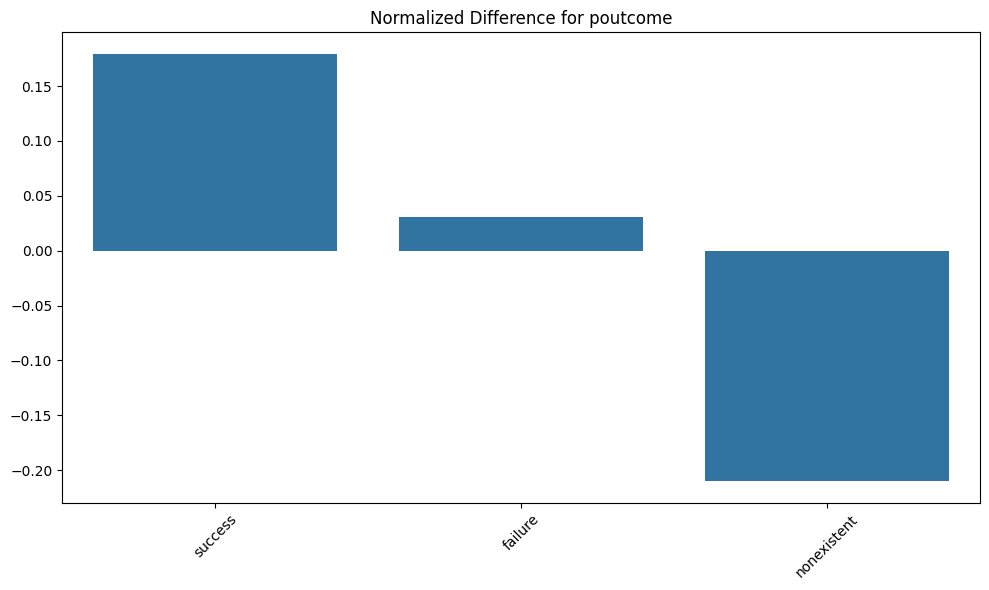

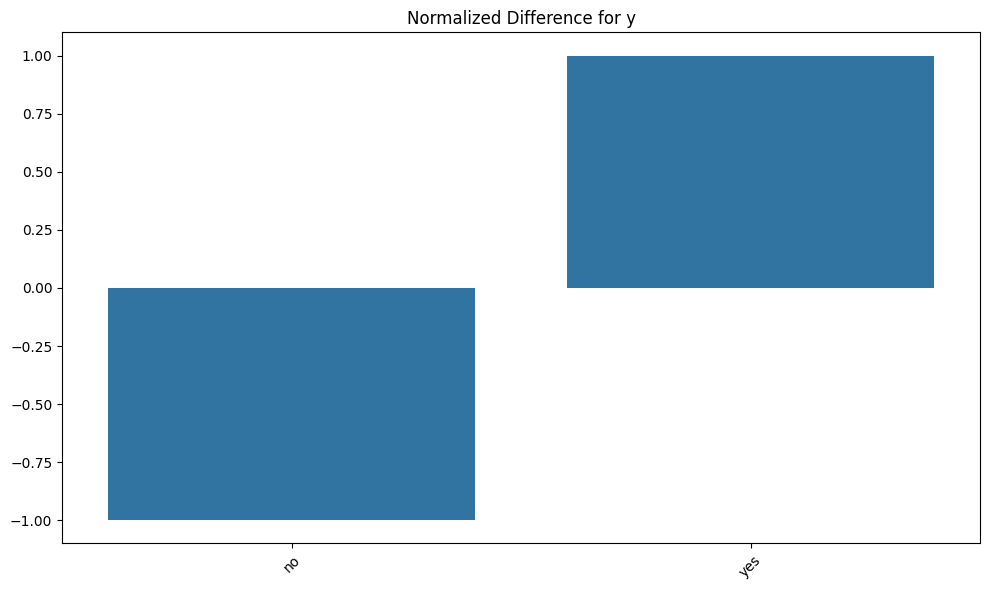

In [17]:
for feature_name in categori:
    # Calculate frequency of positive and negative outcomes
    freq_pos = (data.y.values == 'yes').sum()
    freq_neg = (data.y.values == 'no').sum()
    
    # Get value counts for each feature
    pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
    neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
    # Get all unique categories for this feature
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    # Convert to dictionaries for easier access
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    # Calculate normalized differences
    all_index = list(all_counts)
    all_counts_values = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=all_index, y=all_counts_values)
    plt.title(f'Normalized Difference for {feature_name}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [18]:
data.groupby(['job','marital','y']).y.count()
# And Admin - married people are more interested in Term Deposit.

job      marital   y  
admin.   divorced  no     1148
                   yes     132
         married   no     4601
                   yes     652
         single    no     3309
                          ... 
unknown  married   yes      16
         single    no       59
                   yes      15
         unknown   no        6
                   yes       3
Name: y, Length: 90, dtype: int64

In [19]:
data.groupby(['contact','y']).y.count()
#Contact field has good correlation with Target variable. Since we have two observation for contact lets convert this to binary format. cellular -1 and telephone=0

contact    y  
cellular   no     22291
           yes     3853
telephone  no     14257
           yes      787
Name: y, dtype: int64

{'cellular': np.int64(3853), 'telephone': np.int64(787)}
{'cellular': np.int64(22291), 'telephone': np.int64(14257)}
{'telephone', 'cellular'}


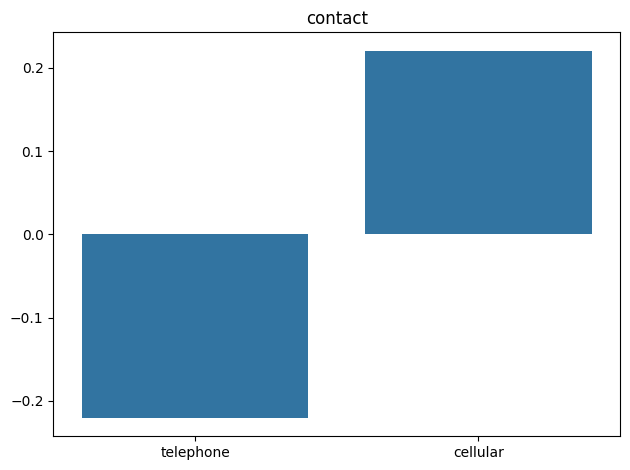

In [20]:
feature_name = 'contact'

pos_freq = data[data.y == 'yes'].groupby([feature_name]).size()
neg_freq = data[data.y == 'no'].groupby([feature_name]).size()
freq_pos = data[data.y == 'yes'].shape[0]
freq_neg = data[data.y == 'no'].shape[0]

pos_counts = dict(pos_freq)
neg_counts = dict(neg_freq)

print(pos_counts)
print(neg_counts)

all_counts = set(pos_counts.keys()).union(set(neg_counts.keys()))

print(all_counts)

all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(x=all_index, y=all_counts)
plt.title(feature_name)
plt.tight_layout()
plt.show()

In [21]:
data.groupby(['day_of_week','y']).age.count()

day_of_week  y  
fri          no     6981
             yes     846
mon          no     7667
             yes     847
thu          no     7578
             yes    1045
tue          no     7137
             yes     953
wed          no     7185
             yes     949
Name: age, dtype: int64

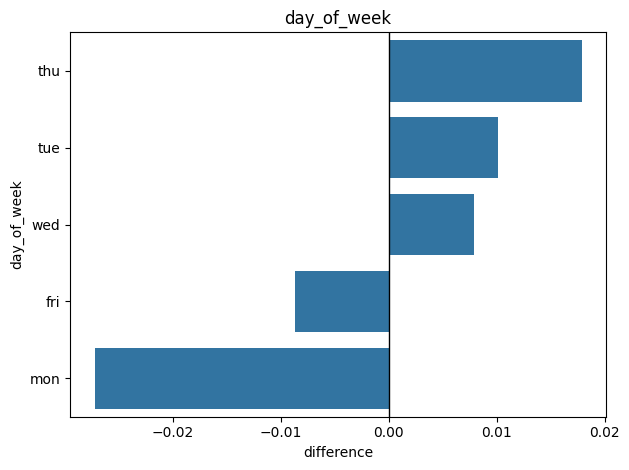

In [22]:
feature_name = 'day_of_week'

# Counts for positive ("yes") and negative ("no") outcomes
pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts()
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()

# All unique category labels
all_labels = list(set(pos_counts.index.tolist() + neg_counts.index.tolist()))

# Total number of positive and negative outcomes
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()

# Convert counts to dictionaries for lookup
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()

# Difference between normalized frequencies
differences = [
    pos_counts.get(label, 0) / freq_pos - neg_counts.get(label, 0) / freq_neg
    for label in all_labels
]

# Create DataFrame for plotting
plot_df = pd.DataFrame({
    feature_name: all_labels,
    'difference': differences
})

# Optional: sort by difference for better readability
plot_df = plot_df.sort_values('difference', ascending=False)

# Plot
sns.barplot(x='difference', y=feature_name, data=plot_df)
plt.axvline(0, color='black', linewidth=1)  # vertical line at 0
plt.title(feature_name)
plt.tight_layout()
plt.show()


In [23]:
data.groupby(['loan','y']).age.count()

loan     y  
no       no     30100
         yes     3850
unknown  no       883
         yes      107
yes      no      5565
         yes      683
Name: age, dtype: int64

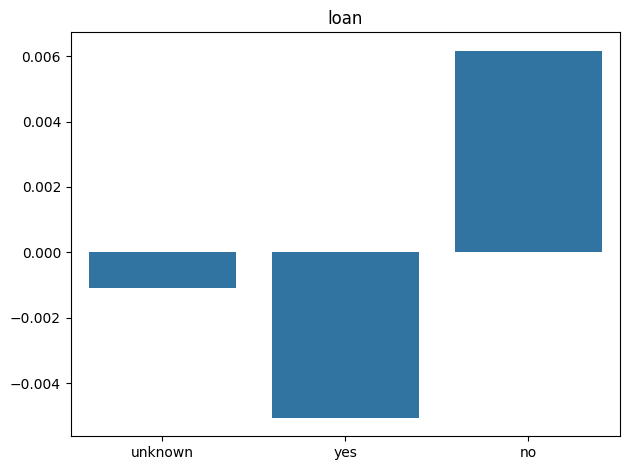

In [24]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'loan'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
sns.barplot(x=all_index, y=all_counts)  

plt.title(feature_name)
plt.tight_layout()

In [25]:
data.groupby(['default','y']).age.count()

default  y  
no       no     28391
         yes     4197
unknown  no      8154
         yes      443
yes      no         3
Name: age, dtype: int64

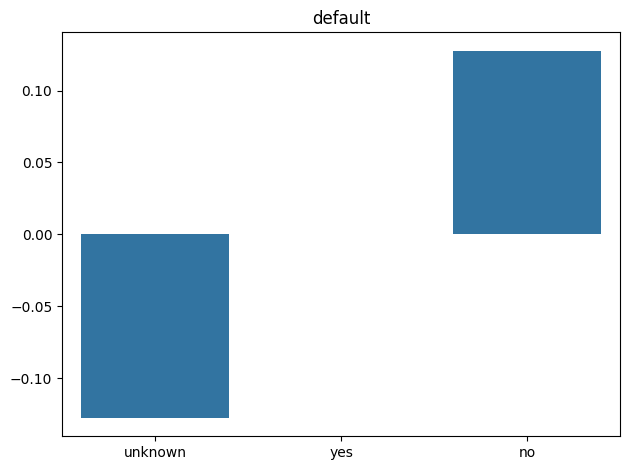

In [26]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'default'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(x=all_index, y=all_counts)  
plt.title(feature_name)
plt.tight_layout()

In [27]:
data.groupby(['housing','y']).age.count()

housing  y  
no       no     16596
         yes     2026
unknown  no       883
         yes      107
yes      no     19069
         yes     2507
Name: age, dtype: int64

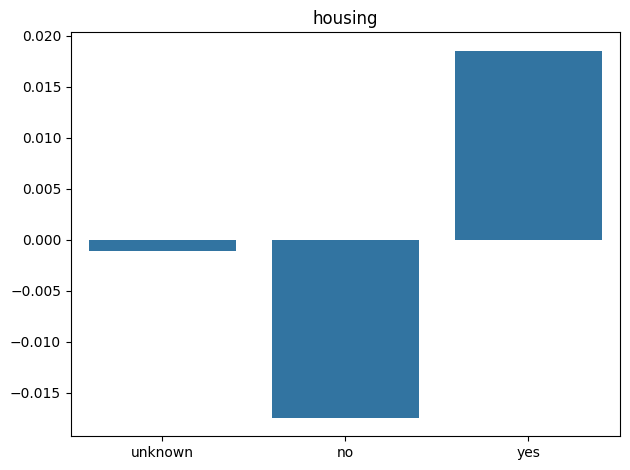

In [28]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'housing'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(x=all_index, y=all_counts)  
plt.title(feature_name)
plt.tight_layout()

In [29]:
data.groupby(['poutcome','y']).age.count()

poutcome     y  
failure      no      3647
             yes      605
nonexistent  no     32422
             yes     3141
success      no       479
             yes      894
Name: age, dtype: int64

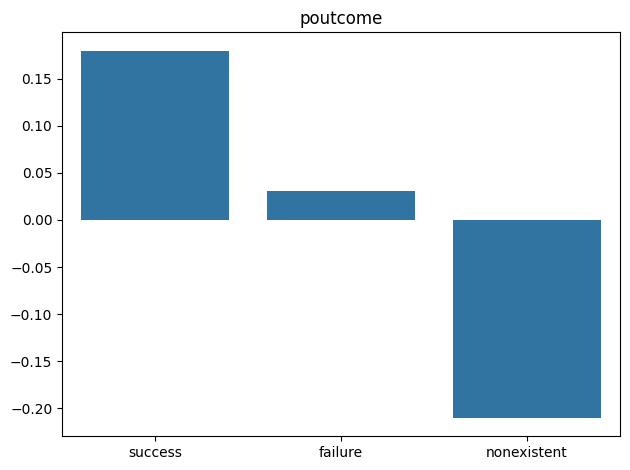

In [30]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'poutcome'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]
sns.barplot(x=all_index, y=all_counts)  
plt.title(feature_name)
plt.tight_layout()

In [31]:
data.groupby(['month','y']).age.count()

month  y  
apr    no      2093
       yes      539
aug    no      5523
       yes      655
dec    no        93
       yes       89
jul    no      6525
       yes      649
jun    no      4759
       yes      559
mar    no       270
       yes      276
may    no     12883
       yes      886
nov    no      3685
       yes      416
oct    no       403
       yes      315
sep    no       314
       yes      256
Name: age, dtype: int64

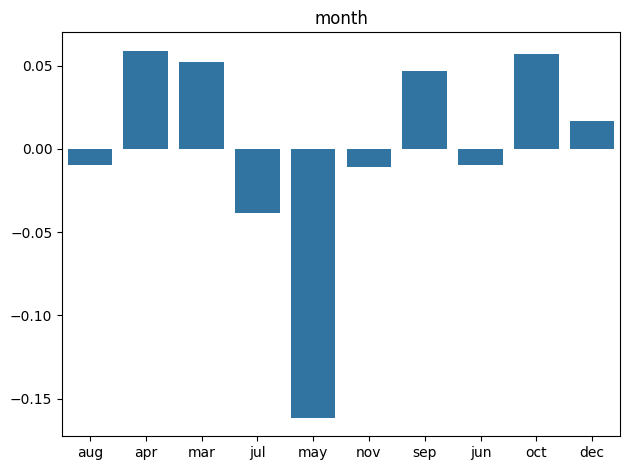

In [32]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'month'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(x=all_index, y=all_counts)  
plt.title(feature_name)
plt.tight_layout()

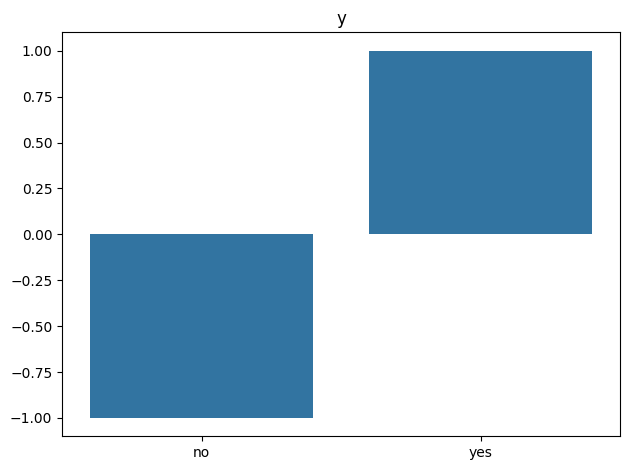

In [33]:
#Normalized distribution of each class per feature and plotted difference between positive and negative frequencies.
#Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the 
#product.
feature_name = 'y'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(x=all_index, y=all_counts)  
plt.title(feature_name)
plt.tight_layout()

Inference/Result: There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

2)Other method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn't gurantee that all missing values will be addressed but majority of them will have a reasonable which can be useful in the prediction.

3)Variables with unknown/missing values are : 'education', 'job', 'housing', 'loan', 'deafult', and 'marital'. But the significant ones are 'education', 'job', 'housing', and 'loan'. The number of unknowns for 'marital' is very low. The unknown for 'default' variable are considered to be recorded as unknown. It may be possible that customer is not willing to disclose this information to the banking representative. Hence the unknown value in 'default' is actually a separate value.

4) Therefore, we start with creating new variables for the unknown values in 'education', 'job', 'housing' and 'loan'. We do this to see if the values are missing at random or is there a pattern in the missing values.


# splitting of data

In [34]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
# Saperating features and result vectors
y=data[['y']]
X = data.drop(['y'], axis=1)
#y = data['y'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [38]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [39]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')

In [40]:
y_train.head()

,y
39075,no
34855,no
7107,no
31614,no
34878,no


In [41]:
y_test.head()

,y
32884,no
3169,no
32206,no
9403,no
14020,no


# Distribution of train and test data

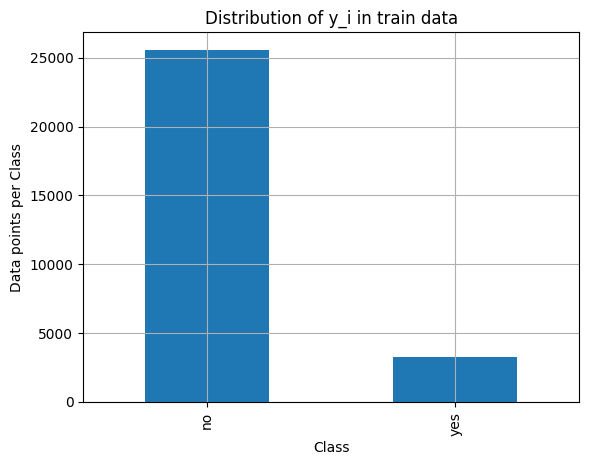

Number of data points in class 1 : 25580 ( 88.724 %)
Number of data points in class 2 : 3251 ( 11.276 %)
--------------------------------------------------------------------------------


In [42]:
def plot_distribution(class_distribution,title,xlabel,ylabel):
    class_distribution.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()


plot_distribution(train_class_distribution,
                 'Distribution of y_i in train data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], 
          '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
    
print('-'*80)

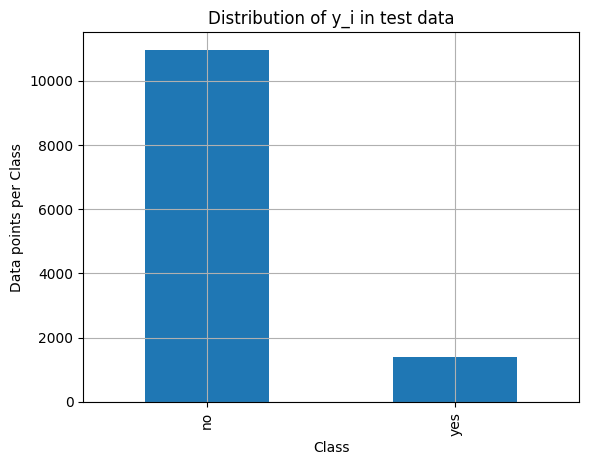

Number of data points in class 1 : 10968 ( 88.759 %)
Number of data points in class 2 : 1389 ( 11.241 %)
--------------------------------------------------------------------------------


In [43]:
plot_distribution(test_class_distribution,
                 'Distribution of y_i in test data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], 
          '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)


Distribution of both train and test data are same

In [44]:
# concatinate train data for data manupulation
data = pd.concat([X_train, y_train], axis=1)

In [45]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [46]:
# concatinate test data for data manupulation
data_1= pd.concat([X_test, y_test], axis=1)

In [47]:
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
32884,57,technician,married,high.school,no,no,yes,cellular,may,mon,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no
9403,36,admin.,married,high.school,no,no,no,telephone,jun,fri,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no


# Imputation:

Now, to infer the missing values in 'job' and 'education', we make use of the cross-tabulation between 'job' and 'education'. Our hypothesis here is that 'job' is influenced by the 'education' of a person. Hence, we can infer 'job' based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict the education.

In [48]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        # https://www.youtube.com/watch?v=qy0fDqoMJx8 for groupby operation
        #https://www.youtube.com/watch?v=hfDXRyYIFkk grupby count
        #https://data36.com/pandas-tutorial-2-aggregation-and-grouping/
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
        #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [49]:
cross_tab(data,'job','education')

,university.degree,basic.6y,high.school,basic.4y,professional.course,basic.9y,unknown,illiterate
job,,,,,,,,
admin.,4038,111,2344,57,263,345,180,0.0
blue-collar,62,1010,620,1658,308,2528,310,4.0
entrepreneur,410,42,161,91,93,146,43,2.0
housemaid,102,59,128,329,48,61,26,1.0
management,1421,57,208,58,66,119,85,0.0
retired,185,50,204,411,167,92,69,2.0
self-employed,550,16,77,64,122,160,25,2.0
services,118,153,1913,86,155,268,116,0.0
student,124,11,263,16,34,65,125,0.0


- Inferring education from jobs : From the cross-tabulation, it can be seen that people with management jobs usually have a university degree. Hence wherever 'job' = management and 'education' = unknown, we can replace 'education' with 'university.degree'. Similarly, 'job' = 'services' --> 'education' = 'high.school' and 'job' = 'housemaid' --> 'education' = 'basic.4y'.

- Inferring jobs from education : If 'education' = 'basic.4y' or 'basic.6y' or 'basic.9y' then the 'job' is usually 'blue-collar'. If 'education' = 'professional.course', then the 'job' = 'technician'.

- While imputing the values for job and education, we were cognizant of the fact that the correlations should make real world sense. If it didn't make real world sense, we didn't replace the missing values.



In [50]:
data['job'][data['age']>60].value_counts()

job
retired          472
housemaid         40
admin.            33
technician        26
unknown           17
management        16
blue-collar       15
unemployed         7
self-employed      7
entrepreneur       6
services           2
Name: count, dtype: int64

Inferring jobs from age: As we see, if 'age' > 60, then the 'job' is 'retired,' which makes sense.

In [51]:

data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'university.degree'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'high.school'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'basic.4y'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.4y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.6y'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='basic.9y'), 'job'] = 'blue-collar'
data.loc[(data['job']=='unknown') & (data['education']=='professional.course'), 'job'] = 'technician'

In [52]:
#youtube.com/watch?v=I_kUj-MfYys use of cross tab
cross_tab(data,'job','education')

,university.degree,basic.6y,high.school,basic.4y,professional.course,basic.9y,unknown,illiterate
job,,,,,,,,
admin.,4038,111.0,2344,57.0,263.0,345.0,180.0,0.0
blue-collar,62,1025.0,620,1690.0,308.0,2551.0,310.0,4.0
entrepreneur,410,42.0,161,91.0,93.0,146.0,43.0,2.0
housemaid,102,59.0,128,355.0,48.0,61.0,0.0,1.0
management,1506,57.0,208,58.0,66.0,119.0,0.0,0.0
retired,186,50.0,204,414.0,169.0,92.0,80.0,2.0
self-employed,550,16.0,77,64.0,122.0,160.0,25.0,2.0
services,118,153.0,2029,86.0,155.0,268.0,0.0,0.0
student,124,11.0,263,16.0,34.0,65.0,125.0,0.0


As we can see, we are able to reduce the number of unknowns and enhance our data set.

# Imputations
Imputation for house and loan : We are again using cross-tabulation between 'house' and 'job' and between 'loan' and 'job.' Our hypothesis is that housing loan status (Yes or No) should be in the proportion of each job category. Hence using the prior known distribution of the housing loan for each job category, the house loan for unknown people will be predicted such that the prior distribution (% House = Yes's and No's for each job category remains the same). Similarly, we have filled the missing values in the 'loan' variable.

In [53]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                 no   yes  unknown
job                               
admin.         3280  3889      169
blue-collar    3062  3326      182
entrepreneur    444   517       27
housemaid       356   381       17
management      939  1030       45
retired         547   614       36
self-employed   461   527       28
services       1280  1464       65
student         271   349       18
technician     2035  2526      103
unemployed      284   398       20
unknown          62    75        4


In [54]:
def fillhousing(data,jobhousing):
    """Function for imputation via cross-tabulation to fill missing values for the 'housing' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    house=["no","yes"]
    for j in jobs:
        #Here we are taking value in which housing is unknow and job value is known
        ind=data[np.logical_and(np.array(data['housing']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobhousing.loc[j]['no'])/(jobhousing.loc[j]['no']+jobhousing.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"housing"]='no'
        data.loc[ind2,"housing"]='yes'
    return data

In [55]:
data=fillhousing(data,jobhousing)

In [56]:
jobhousing=cross_tab(data,'job','housing')
print(jobhousing)

                 no   yes  unknown
job                               
admin.         3361  3977      0.0
blue-collar    3146  3424      0.0
entrepreneur    457   531      0.0
housemaid       363   391      0.0
management      965  1049      0.0
retired         564   633      0.0
self-employed   479   537      0.0
services       1319  1490      0.0
student         277   361      0.0
technician     2078  2586      0.0
unemployed      290   412      0.0
unknown          62    75      4.0


# Imputation for personnel loan and loan 

In [57]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes  unknown
job                               
admin.         5968  1201      169
blue-collar    5413   975      182
entrepreneur    810   151       27
housemaid       635   102       17
management     1670   299       45
retired         986   175       36
self-employed   849   139       28
services       2300   444       65
student         522    98       18
technician     3880   681      103
unemployed      586    96       20
unknown         114    23        4


In [58]:
def fillloan(data,jobloan):
    """Function for imputation via cross-tabulation to fill missing values for the 'loan' categorical feature"""
    jobs=['housemaid','services','admin.','blue-collar','technician','retired','management','unemployed','self-employed','entrepreneur','student']
    loan=["no","yes"]
    for j in jobs:
        ind=data[np.logical_and(np.array(data['loan']=='unknown'),np.array(data['job']==j))].index
        mask=np.random.rand(len(ind))<((jobloan.loc[j]['no'])/(jobloan.loc[j]['no']+jobloan.loc[j]['yes']))
        ind1=ind[mask]
        ind2=ind[~mask]
        data.loc[ind1,"loan"]='no'
        data.loc[ind2,"loan"]='yes'
    return data

In [59]:
data=fillloan(data,jobloan)

In [60]:
jobloan=cross_tab(data,'job','loan')
print(jobloan)

                 no   yes  unknown
job                               
admin.         6102  1236      0.0
blue-collar    5564  1006      0.0
entrepreneur    833   155      0.0
housemaid       652   102      0.0
management     1708   306      0.0
retired        1017   180      0.0
self-employed   873   143      0.0
services       2354   455      0.0
student         537   101      0.0
technician     3965   699      0.0
unemployed      603    99      0.0
unknown         114    23      4.0


# Numerical variables:


Let see the summary of the data in order to understand the numerical variables

In [61]:
numerical_variables = ['age','campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx','cons.conf.idx','euribor3m',
                      'nr.employed']
data[numerical_variables].describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000,28831.000000
mean,40.011203,2.575769,963.215844,0.172592,0.083202,93.577264,-40.515091,3.621599,5167.011880
std,10.450128,2.752303,185.077567,0.494338,1.570978,0.579694,4.634864,1.735202,72.542598
min,17.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


- Missing Values: From the source of the data (U.C. Irvine ML Repository), we're told that the missing values, or NaNs, are encoded as '999'. From the above table, it is clear that only 'pdays' has missing values. Moreover, a majority of the values for 'pdays' are missing.




In [62]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,3,999,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,4,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,1,999,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,9,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no


In [63]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

#Balancing y out

<Axes: xlabel='y', ylabel='count'>

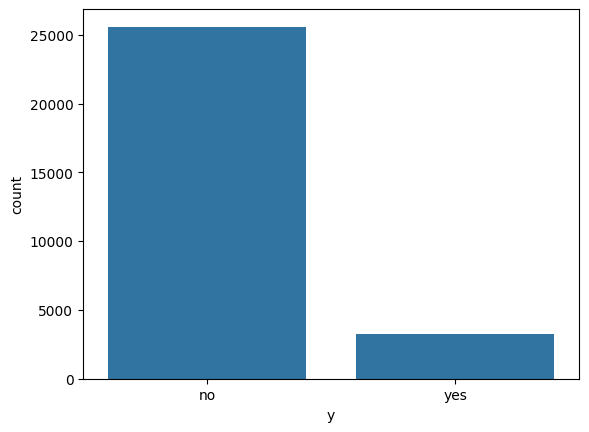

In [64]:
sns.countplot(x='y',data=data)

We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [65]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<Axes: xlabel='y', ylabel='count'>

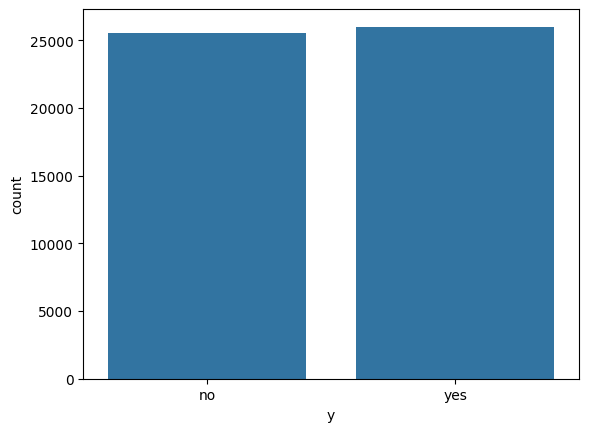

In [66]:
sns.countplot(x='y',data=data)

# Missing Values in Numerical Variables

Let's examine the missing values in 'pdays'

In [67]:
def drawhist(data,feature):
    plt.hist(data[feature])

Filtered out missing values encoded with an out-of-range value when plotting the histogram of values in order to properly understand the distribution of the known values. Here, histograms were created using matplotlib.

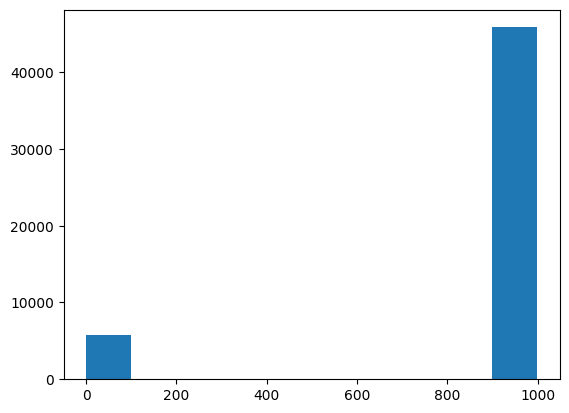

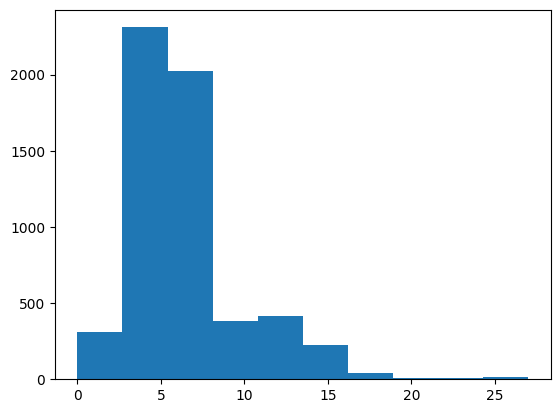

In [68]:
drawhist(data,'pdays')
plt.show()

plt.hist(data.loc[data.pdays != 999, 'pdays'])
plt.show()

In [69]:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.crosstab.html
#Compute a simple cross-tabulation of two (or more) factors
pd.crosstab(data['pdays'],data['poutcome'], values=data['age'], aggfunc='count', normalize=True)

poutcome,failure,nonexistent,success
pdays,,,
0,0.000000,0.000000,0.001124
1,0.000000,0.000000,0.001182
2,0.000000,0.000000,0.003683
3,0.000019,0.000000,0.034446
4,0.000174,0.000000,0.006998
5,0.000330,0.000000,0.002830
6,0.001376,0.000000,0.032566
7,0.000698,0.000000,0.003101
8,0.000640,0.000000,0.000853


In [70]:
#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data['pdays2']=data.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data['pdays']=data.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data['pdays']=data['pdays'].astype(int)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
39075,29,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,30,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no,0
34855,29,technician,single,university.degree,no,no,no,telephone,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
7107,45,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
31614,34,services,married,university.degree,no,no,no,cellular,may,thu,...,30,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no,0
34878,32,admin.,single,high.school,no,no,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0


As we can see from the above table, the majority of the values for 'pdays' are missing. The majority of these
missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays'
are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories: pdays,pdays2

# outlier check

# Outliers
Outliers are defined as 1.5 x Q3 value (75th percentile). From the above table, it can be seen that only 'age' and 'campaign' have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.

<Axes: >

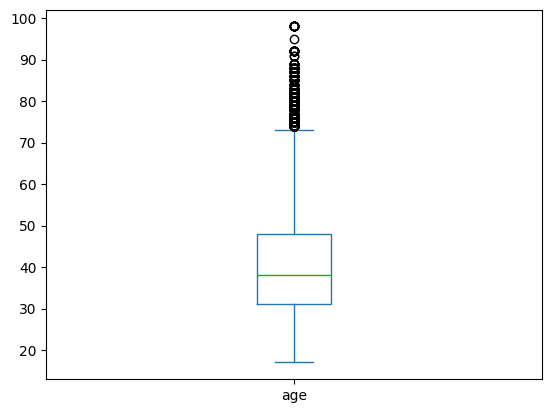

In [71]:
# Check outlier if any for Numberic column.
data.age.plot(kind='box')
# There are outlier and check max age and age greated than 90

In [72]:
print(data.age.max())
data[data['age'] > 80].head(5)

98


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
27813,88,retired,divorced,basic.4y,no,yes,no,cellular,mar,wed,...,30,0,nonexistent,-1.8,92.843,-50.0,1.663,5099.1,yes,0
38032,91,retired,married,university.degree,no,no,yes,cellular,sep,wed,...,30,0,nonexistent,-3.4,92.379,-29.8,0.781,5017.5,no,0
37472,88,retired,divorced,basic.4y,no,yes,no,cellular,aug,thu,...,30,0,nonexistent,-2.9,92.201,-31.4,0.873,5076.2,no,0
39625,82,retired,married,high.school,unknown,yes,no,cellular,may,mon,...,30,0,nonexistent,-1.8,93.876,-40.0,0.682,5008.7,no,0
39466,82,retired,divorced,basic.4y,no,yes,yes,cellular,apr,mon,...,30,0,nonexistent,-1.8,93.749,-34.6,0.643,5008.7,yes,0


<Axes: ylabel='Frequency'>

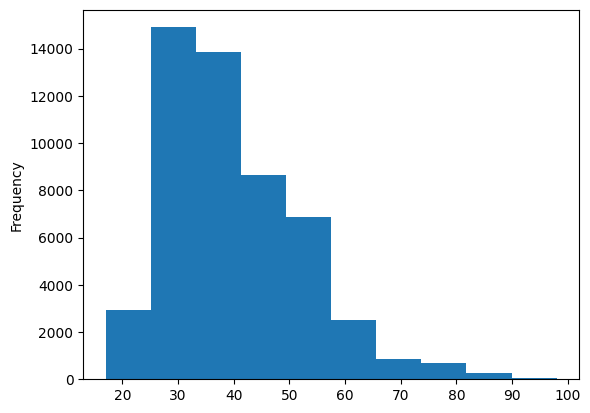

In [73]:
data.age.plot(kind='hist')
# it is bit positively skewed but it is ok and seems no high dependency with Output variable

<Axes: ylabel='Density'>

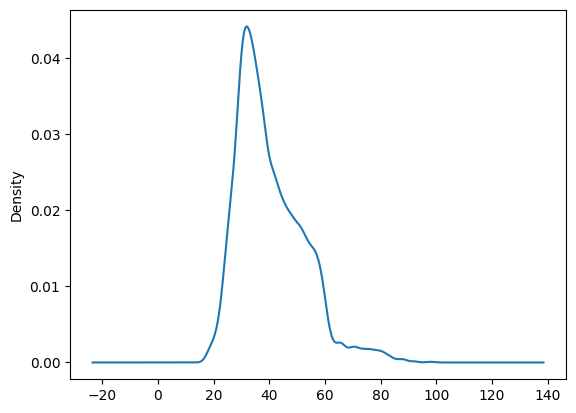

In [74]:
data.age.plot(kind='kde')

In [75]:
# Create Binning for all numeric fields base on Box plot quantile
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)

In [76]:
binning(data,'age')

age
31.0 38.0 48.0


# outliner check for feature campaign

<Axes: ylabel='Frequency'>

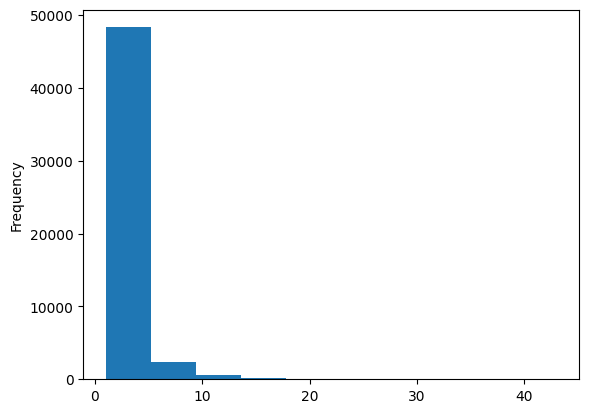

In [77]:
# let check campaign field now and it is positively skewed..
data.campaign.plot(kind='hist')

<Axes: >

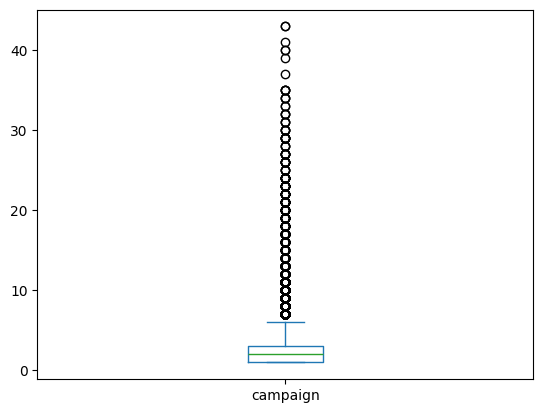

In [78]:
data.campaign.plot(kind='box')
# lot of exreme values.

In [79]:
print(data.campaign.max())
print(data.campaign.mean())
print(data.campaign.median())
print(data.campaign.unique())
print('Y=1 for campaign > 10' , data[(data['campaign'] > 10) & (data['y'] ==1)].age.count())
print('Y=1 for campaign < 10' , data[(data['campaign'] <= 10) & (data['y'] ==1)].age.count())
print('Y=1 for campaign = 1' , data[(data['campaign'] == 1) & (data['y'] ==1)].age.count())

43
2.334670853686904
2.0
[ 3  4  2  1  9  5  6 12  7  8 10 11 19 15 13 14 17 18 25 32 21 16 40 24
 27 22 23 35 20 43 26 29 33 31 28 34 30 41 39 37]
Y=1 for campaign > 10 0
Y=1 for campaign < 10 0
Y=1 for campaign = 1 0


In [80]:
data.groupby(['campaign','y']).y.count()

campaign  y  
1         no     10648
          yes    12928
2         no      6538
          yes     6808
3         no      3401
          yes     3224
4         no      1709
          yes     1464
5         no      1012
          yes      568
6         no       641
          yes      424
7         no       409
          yes      200
8         no       269
          yes      112
9         no       205
          yes      104
10        no       149
          yes       48
11        no       119
          yes       56
12        no        93
          yes       16
13        no        62
          yes       32
14        no        46
          yes        8
15        no        33
16        no        38
17        no        41
          yes       16
18        no        22
19        no        19
20        no        20
21        no        18
22        no        12
23        no        11
24        no        12
25        no         4
26        no         7
27        no         6
28        no        

In [81]:
data['campaign'].describe()

count    51588.000000
mean         2.334671
std          2.328928
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         43.000000
Name: campaign, dtype: float64

In [82]:
q1 = data['campaign'].quantile(0.25)
q2 = data['campaign'].quantile(0.50)
q3 = data['campaign'].quantile(0.75)

print(q1)
print(q2)
print(q3)

iqr = q3-q1 #Interquartile range

extreme_low_campaign = q1-1.5*iqr
extreme_high_capmaign = q3+1.5*iqr

print (extreme_low_campaign)
print (extreme_high_capmaign)

1.0
2.0
3.0
-2.0
6.0


In [83]:
binning(data,'campaign')

campaign
1.0 2.0 3.0


In [84]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
39075,1,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,30,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no,0
34855,1,technician,single,university.degree,no,no,no,telephone,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
7107,3,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
31614,2,services,married,university.degree,no,no,no,cellular,may,thu,...,30,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no,0
34878,2,admin.,single,high.school,no,no,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0


# Standardizing the data

In [85]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2'],
      dtype='object')

In [86]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
39075,1,admin.,married,university.degree,no,no,no,cellular,dec,mon,...,30,1,failure,-3.0,92.713,-33.0,0.709,5023.5,no,0
34855,1,technician,single,university.degree,no,no,no,telephone,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0
7107,3,blue-collar,married,basic.6y,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
31614,2,services,married,university.degree,no,no,no,cellular,may,thu,...,30,1,failure,-1.8,92.893,-46.2,1.327,5099.1,no,0
34878,2,admin.,single,high.school,no,no,no,cellular,may,fri,...,30,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1,no,0


In [87]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data[data.columns[idx_numeric]] = scaler.fit_transform(data[data.columns[idx_numeric]])

# Categorical variables can be either Ordinal or Nominal

In [88]:
data['poutcome'] = data['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data['default'] = data['default'].map({'yes': -1,'unknown': 0,'no': 1})
data['housing'] = data['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data['loan'] = data['loan'].map({'yes': -1,'unknown': 0,'no': 1})

# Handling Nominal Variables(One Hot Encoding)

'job', 'maritial', 'education', 'contact', 'month', 'day_of_week' are Nominal Variables

In [89]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
data_clean = pd.get_dummies(data,columns=nominal)
data_clean['y']=data_clean['y'].map({'yes': 1,'no': 0})
data_clean.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39075,0.000000,1,1,1,0.666667,1.0,0.142857,-1,0.083333,0.199532,...,False,False,False,False,False,False,True,False,False,False
34855,0.000000,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False
7107,0.666667,0,-1,1,0.333333,1.0,0.000000,0,0.937500,0.698753,...,False,True,False,False,False,False,False,True,False,False
31614,0.333333,1,1,1,0.000000,1.0,0.142857,-1,0.333333,0.269680,...,False,True,False,False,False,False,False,True,False,False
34878,0.333333,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False


In [90]:
data_clean.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

In [91]:
data_clean.shape

(51588, 56)

In [92]:
df_with_dummies=pd.get_dummies(data_clean)

In [93]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [94]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean = dropfeature(df_with_dummies, features_dropped)

# Aanalising the data distribution by plotting graphs for numerical fields

In [95]:
 data_clean.describe()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
count,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000,51588.000000
mean,0.481165,0.842211,-0.082461,0.687408,0.327718,0.910696,0.044465,-0.012348,0.604021,0.498476,0.442809,0.526825,0.648359,0.504148,0.111324
std,0.369656,0.364653,0.996565,0.726225,0.366461,0.255672,0.099432,0.465140,0.358692,0.247116,0.224640,0.428502,0.330163,0.499988,0.314536
min,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.333333,0.269680,0.338912,0.138291,0.425709,0.000000,0.000000
50%,0.333333,1.000000,-1.000000,1.000000,0.333333,1.000000,0.000000,0.000000,0.687500,0.484412,0.376569,0.767853,0.859735,1.000000,0.000000
75%,0.666667,1.000000,1.000000,1.000000,0.666667,1.000000,0.000000,0.000000,1.000000,0.698753,0.602510,0.980503,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [96]:
data_clean.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39075,0.000000,1,1,1,0.666667,1.0,0.142857,-1,0.083333,0.199532,...,False,False,False,False,False,False,True,False,False,False
34855,0.000000,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False
7107,0.666667,0,-1,1,0.333333,1.0,0.000000,0,0.937500,0.698753,...,False,True,False,False,False,False,False,True,False,False
31614,0.333333,1,1,1,0.000000,1.0,0.142857,-1,0.333333,0.269680,...,False,True,False,False,False,False,False,True,False,False
34878,0.333333,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False


In [97]:
data_clean.shape


(51588, 52)

In [98]:
data_clean.corr()
# Input feature - nr.employed and  euribor3m (.94) and emp.var.rate and nr.employed (.90) 
#and euribor3m and emp.var.rate (.97) are more correlated and we can remove on column.
# And lets Remove columns - euribor3m and emp.var.rate 

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
age,1.000000,-0.159097,-0.001322,0.003100,0.004681,-0.016179,0.014762,0.011068,0.030919,0.018910,...,-0.038413,-0.033938,0.032674,0.017616,0.005111,0.006108,0.030581,-0.024087,0.013874,-0.025249
default,-0.159097,1.000000,-0.019429,-0.005087,-0.052518,-0.116533,0.128664,0.025770,-0.269147,-0.169529,...,0.068832,-0.104417,0.061367,0.070678,0.072096,-0.019440,-0.008828,0.010356,-0.001139,0.018116
housing,-0.001322,-0.019429,1.000000,0.040290,0.001952,0.007912,-0.009639,-0.002071,0.047568,0.059608,...,-0.013602,0.017866,-0.026064,0.014022,0.002064,0.013733,-0.010372,-0.015512,0.004912,0.007973
loan,0.003100,-0.005087,0.040290,1.000000,-0.012350,0.019385,-0.000027,-0.018198,-0.013295,-0.008933,...,0.015185,-0.008631,-0.003285,0.017894,-0.001824,0.000908,-0.004767,0.003704,-0.001393,0.001412
campaign,0.004681,-0.052518,0.001952,-0.012350,1.000000,0.087789,-0.089996,-0.019361,0.184304,0.121563,...,-0.033663,0.033967,-0.082197,-0.099385,-0.037290,0.053995,0.060507,-0.043922,-0.035848,-0.031424
pdays,-0.016179,-0.116533,0.007912,0.019385,0.087789,1.000000,-0.700447,-0.659579,0.331613,0.040687,...,-0.081912,0.109855,-0.027498,-0.133870,-0.175936,0.011980,0.009906,0.002568,-0.013781,-0.010348
previous,0.014762,0.128664,-0.009639,-0.000027,-0.089996,-0.700447,1.000000,0.075520,-0.379976,-0.057011,...,0.069092,-0.061921,0.064608,0.125413,0.159271,-0.007175,-0.008406,0.001133,0.010009,0.004146
poutcome,0.011068,0.025770,-0.002071,-0.018198,-0.019361,-0.659579,0.075520,1.000000,-0.008916,0.114572,...,0.047210,-0.102090,-0.042283,0.049451,0.089394,-0.016053,0.000790,-0.002185,0.006060,0.011029
emp.var.rate,0.030919,-0.269147,0.047568,-0.013295,0.184304,0.331613,-0.379976,-0.008916,1.000000,0.716164,...,-0.142870,0.021320,-0.070048,-0.219587,-0.167067,-0.006567,0.005030,-0.013159,-0.017998,0.032894
cons.price.idx,0.018910,-0.169529,0.059608,-0.008933,0.121563,0.040687,-0.057011,0.114572,0.716164,1.000000,...,-0.105663,-0.017368,-0.137411,-0.080378,-0.020259,-0.010674,0.011871,-0.004324,-0.021168,0.024189


In [99]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

Inferences: From the above heat map we can see that 'y' (our target variable) has good correlation with 'previous', 'emp.var.rate', 'euribor3m', 'nr.employed', 'pdays_missing', 'poutcome_success' , 'poutcome_nonexistent'and 'pdays_bet_5_15'. We expect to see these independent variables as significant while building the models.

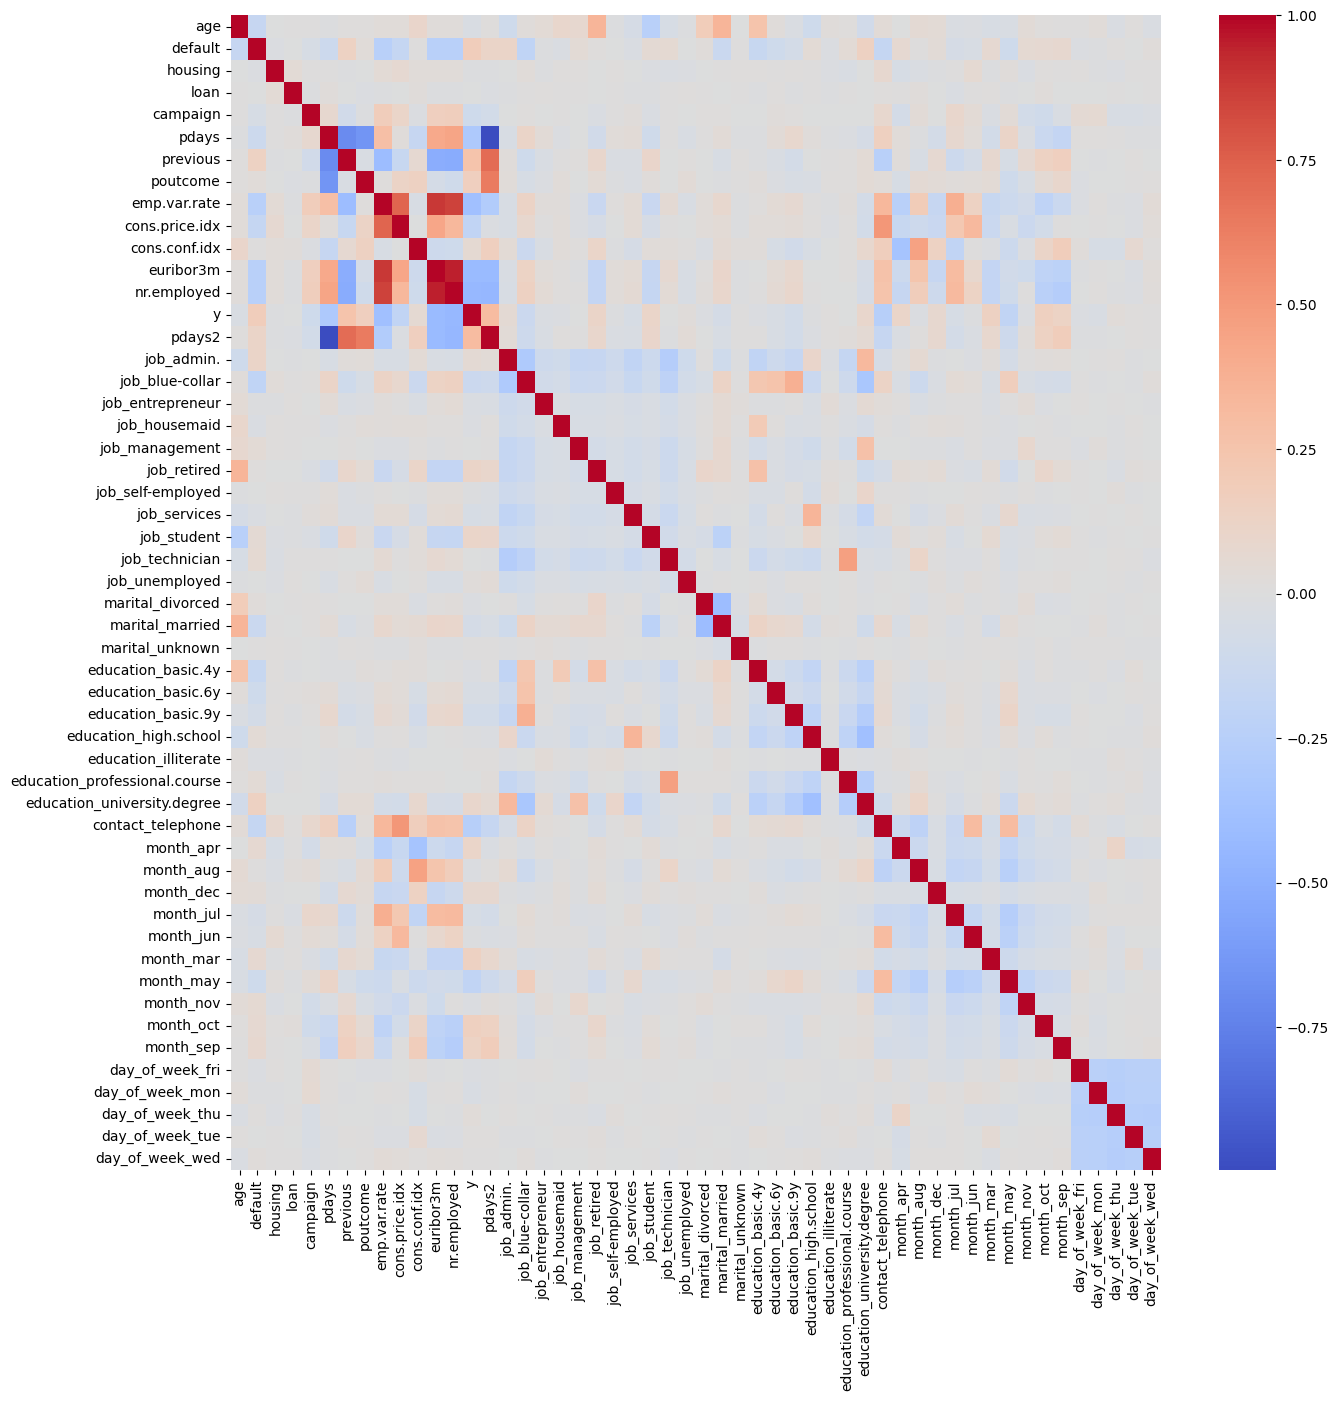

In [100]:
drawheatmap(data_clean)

# Standardizing the test data

In [101]:
data_1= pd.concat([X_test, y_test], axis=1)

In [102]:
data_1.shape

(12357, 20)

In [103]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

As we seen in train data the majority of the values for 'pdays' are missing. The majority of these missing values occur when the 'poutcome' is 'non-existent'. This means that the majority of the values in 'pdays' are missing because the customer was never contacted before. To deal with this variable, we removed the numerical variable 'pdays' and replaced it with categorical variables with following categories:'pdays' and 'pdays2'

# Balancing y out

<Axes: xlabel='y', ylabel='count'>

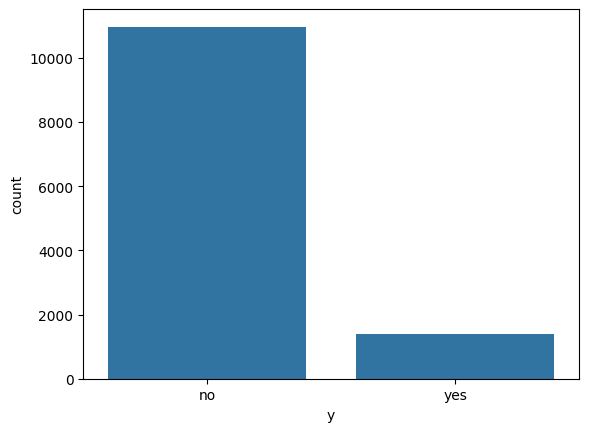

In [104]:
sns.countplot(x='y',data=data_1)

We can see that the data is very skewed, so we duplicate the tuples corresponding to 'yes'

In [105]:
d1=data_1.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data_1=d1

<Axes: xlabel='y', ylabel='count'>

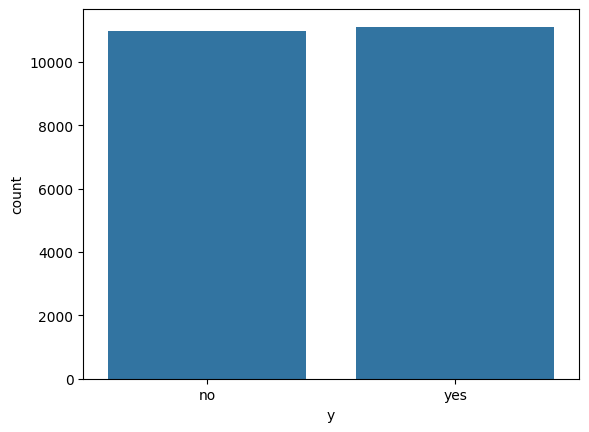

In [106]:
sns.countplot(x='y',data=data_1)

In [107]:

#creating a new column named "pdays2" based on the value in "pdays" column 
def function (row):
    if(row['pdays']==999):
        return 0;
    return 1;
data_1['pdays2']=data_1.apply(lambda row: function(row),axis=1)
#changing the value 999 in pdays column to  value 30 
def function1 (row):
    if(row['pdays']==999):
        return 30;
    return row['pdays'];
data_1['pdays']=data_1.apply(lambda row: function1(row),axis=1)

#changing the type of pdays to int
data_1['pdays']=data_1['pdays'].astype(int)
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
32884,57,technician,married,high.school,no,no,yes,cellular,may,mon,...,30,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no,0
3169,55,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,30,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no,0
32206,33,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,30,1,failure,-1.8,92.893,-46.2,1.313,5099.1,no,0
9403,36,admin.,married,high.school,no,no,no,telephone,jun,fri,...,30,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1,no,0
14020,27,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,30,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,0


In [108]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2'],
      dtype='object')

In [109]:
idx_numeric=[0,10,11,12,14,15,16,17,18]
scaler = MinMaxScaler()
data_1[data_1.columns[idx_numeric]] = scaler.fit_transform(data_1[data_1.columns[idx_numeric]])

In [110]:
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
32884,0.519481,technician,married,high.school,no,no,yes,cellular,may,mon,...,1.0,0.166667,failure,0.333333,0.269680,0.192469,0.150759,0.512287,no,0
3169,0.493506,unknown,married,unknown,unknown,yes,no,telephone,may,thu,...,1.0,0.000000,nonexistent,0.937500,0.698753,0.602510,0.958059,0.859735,no,0
32206,0.207792,blue-collar,married,basic.9y,no,no,no,cellular,may,fri,...,1.0,0.166667,failure,0.333333,0.269680,0.192469,0.153933,0.512287,no,0
9403,0.246753,admin.,married,high.school,no,no,no,telephone,jun,fri,...,1.0,0.000000,nonexistent,1.000000,0.882307,0.376569,0.982317,1.000000,no,0
14020,0.129870,housemaid,married,high.school,no,yes,no,cellular,jul,fri,...,1.0,0.000000,nonexistent,1.000000,0.669135,0.338912,0.981410,1.000000,no,0


#Categorical variables can be either Ordinal or Nominal

In [111]:
data_1['poutcome'] = data_1['poutcome'].map({'failure': -1,'nonexistent': 0,'success': 1})
data_1['default'] = data_1['default'].map({'yes': -1,'unknown': 0,'no': 1})
data_1['housing'] = data_1['housing'].map({'yes': -1,'unknown': 0,'no': 1})
data_1['loan'] = data_1['loan'].map({'yes': -1,'unknown': 0,'no': 1})

In [112]:
data_1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays2
32884,0.519481,technician,married,high.school,1,1,-1,cellular,may,mon,...,1.0,0.166667,-1,0.333333,0.269680,0.192469,0.150759,0.512287,no,0
3169,0.493506,unknown,married,unknown,0,-1,1,telephone,may,thu,...,1.0,0.000000,0,0.937500,0.698753,0.602510,0.958059,0.859735,no,0
32206,0.207792,blue-collar,married,basic.9y,1,1,1,cellular,may,fri,...,1.0,0.166667,-1,0.333333,0.269680,0.192469,0.153933,0.512287,no,0
9403,0.246753,admin.,married,high.school,1,1,1,telephone,jun,fri,...,1.0,0.000000,0,1.000000,0.882307,0.376569,0.982317,1.000000,no,0
14020,0.129870,housemaid,married,high.school,1,-1,1,cellular,jul,fri,...,1.0,0.000000,0,1.000000,0.669135,0.338912,0.981410,1.000000,no,0


In [113]:
data_1.shape

(22080, 21)

#Handling Nominal Variables(One Hot Encoding)


'job', 'maritial', 'education', 'contact', 'month', 'day_of_week' are Nominal Variables

In [114]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day_of_week']
data_clean_1 = pd.get_dummies(data_1,columns=nominal)
data_clean_1['y']=data_clean_1['y'].map({'yes': 1,'no': 0})
data_clean_1.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
32884,0.519481,1,1,-1,0.000000,1.0,0.166667,-1,0.333333,0.269680,...,False,True,False,False,False,False,True,False,False,False
3169,0.493506,0,-1,1,0.018182,1.0,0.000000,0,0.937500,0.698753,...,False,True,False,False,False,False,False,True,False,False
32206,0.207792,1,1,1,0.000000,1.0,0.166667,-1,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False
9403,0.246753,1,1,1,0.054545,1.0,0.000000,0,1.000000,0.882307,...,False,False,False,False,False,True,False,False,False,False
14020,0.129870,1,-1,1,0.018182,1.0,0.000000,0,1.000000,0.669135,...,False,False,False,False,False,True,False,False,False,False


In [115]:
data_clean_1.shape

(22080, 56)

In [116]:
df_with_dummies=pd.get_dummies(data_clean_1)

In [117]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [118]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean_1 = dropfeature(df_with_dummies, features_dropped)

In [119]:
data_clean_1.shape

(22080, 52)

In [120]:
data_clean.shape

(51588, 52)

In [121]:
data_clean_1.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

In [122]:
data_clean.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed'],
      dtype='object')

# Create Model

In [123]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [124]:
data_clean.shape

(51588, 52)

In [125]:
data_clean_1.shape

(22080, 52)

In [126]:
# Saperating features and result vectors
y_test=data_clean_1[['y']]
X_test = data_clean_1.drop(['y'], axis=1)

#y = data['y'].values

In [127]:
# Saperating features and result vectors
y_train=data_clean[['y']]
X_train = data_clean.drop(['y'], axis=1)

#y = data['y'].values

In [128]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
     from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
     classifier.fit(X_train,y_train) 
     print(classifier.score(X_test,y_test)) 
     print(confusion_matrix(y_test,classifier.predict(X_test)))
     print(accuracy_score(y_test,classifier.predict(X_test)))
     print(precision_score(y_test,classifier.predict(X_test)))
     print(recall_score(y_test,classifier.predict(X_test)))
     f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
     print("f1 score", f1)
     return classifier

In [129]:
X_train.shape

(51588, 51)

In [130]:
X_test.shape

(22080, 51)

In [131]:
# inport Dummy Classifier for creating Base Model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent',random_state=0)
finalModel = Convert_Model(X_train,y_train,X_test,y_test,classifier)

0.5032608695652174
[[    0 10968]
 [    0 11112]]
0.5032608695652174
0.5032608695652174
1.0
f1 score 0.6695589298626176



# LogisticRegression




In [132]:
# Diagnostic: Check X_train and X_test before scaling
print("=== DIAGNOSTIC: X_train and X_test comparison ===")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_train type: {type(X_train)}")
print(f"X_test type: {type(X_test)}")

if hasattr(X_train, 'columns') and hasattr(X_test, 'columns'):
    print(f"\nX_train columns ({len(X_train.columns)}): {list(X_train.columns)}")
    print(f"\nX_test columns ({len(X_test.columns)}): {list(X_test.columns)}")
    
    # Find differences
    train_cols = set(X_train.columns)
    test_cols = set(X_test.columns)
    only_in_test = test_cols - train_cols
    only_in_train = train_cols - test_cols
    
    if only_in_test:
        print(f"\nColumns ONLY in X_test: {list(only_in_test)}")
    if only_in_train:
        print(f"\nColumns ONLY in X_train: {list(only_in_train)}")
        
    if not only_in_test and not only_in_train:
        print("\nAll columns match between X_train and X_test")
else:
    print("\nX_train or X_test doesn't have column information (already numpy arrays)")

=== DIAGNOSTIC: X_train and X_test comparison ===
X_train shape: (51588, 51)
X_test shape: (22080, 51)
X_train type: <class 'pandas.core.frame.DataFrame'>
X_test type: <class 'pandas.core.frame.DataFrame'>

X_train columns (51): ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays2', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', '

In [133]:
# Check what columns are in X_test (DataFrame)
print("X_test columns:")
print(list(X_test.columns))
print(f"\nTotal columns in X_test: {len(X_test.columns)}")

# Let's also check if there are any obvious suspects for the extra column
extra_columns = [col for col in X_test.columns if 'pdays' in col.lower()]
print(f"\nColumns containing 'pdays': {extra_columns}")

X_test columns:
['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays2', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

Total columns in X_test: 51

Columns containing 'pdays': ['pdays', 'pdays2']


In [134]:
# Fix the feature mismatch by removing pdays2 from X_test
print("Before fixing:")
print(f"X_test shape: {X_test.shape}")
print(f"Columns with 'pdays': {[col for col in X_test.columns if 'pdays' in col.lower()]}")

# Remove pdays2 column from X_test to match X_train
if 'pdays2' in X_test.columns:
    X_test = X_test.drop('pdays2', axis=1)
    print(f"\nAfter removing 'pdays2':")
    print(f"X_test shape: {X_test.shape}")
    print(f"Columns with 'pdays': {[col for col in X_test.columns if 'pdays' in col.lower()]}")
else:
    print("\n'pdays2' column not found in X_test")

print(f"\nNow X_train shape: {X_train.shape}")
print(f"Now X_test shape: {X_test.shape}")
print(f"Shapes match: {X_train.shape[1] == X_test.shape[1]}")

Before fixing:
X_test shape: (22080, 51)
Columns with 'pdays': ['pdays', 'pdays2']

After removing 'pdays2':
X_test shape: (22080, 50)
Columns with 'pdays': ['pdays']

Now X_train shape: (51588, 51)
Now X_test shape: (22080, 50)
Shapes match: False


In [135]:
# Check the columns in X_train and X_test to identify the mismatch
print("X_train columns:")
print(X_train.columns.tolist() if hasattr(X_train, 'columns') else f"X_train shape: {X_train.shape}")
print("\nX_test columns:")
print(X_test.columns.tolist() if hasattr(X_test, 'columns') else f"X_test shape: {X_test.shape}")

# Check if they're different
if hasattr(X_train, 'columns') and hasattr(X_test, 'columns'):
    train_cols = set(X_train.columns)
    test_cols = set(X_test.columns)
    print(f"\nColumns only in X_test: {test_cols - train_cols}")
    print(f"Columns only in X_train: {train_cols - test_cols}")

X_train columns:
['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays2', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed']

X_test columns:
['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'co

In [139]:
# Debug the data types and shapes
print("=== DEBUGGING DATA TYPES AND SHAPES ===")
print(f"X_train type: {type(X_train)}")
print(f"X_test type: {type(X_test)}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

# Check if they have column information
print(f"X_train has columns attribute: {hasattr(X_train, 'columns')}")
print(f"X_test has columns attribute: {hasattr(X_test, 'columns')}")

if hasattr(X_train, 'columns'):
    print(f"X_train columns ({len(X_train.columns)}): {list(X_train.columns)}")
if hasattr(X_test, 'columns'):
    print(f"X_test columns ({len(X_test.columns)}): {list(X_test.columns)}")

# Since there's a feature count mismatch, let's go back to the source data
# and reconstruct X_train and X_test with matching features
print("\n=== RECONSTRUCTING FROM CLEAN DATA ===")

# Use the data_clean and data_clean_1 DataFrames to rebuild properly
y_train_new = data_clean[['y']]
X_train_new = data_clean.drop(['y'], axis=1)

y_test_new = data_clean_1[['y']]  
X_test_new = data_clean_1.drop(['y'], axis=1)

print(f"Original data_clean shape: {data_clean.shape}")
print(f"Original data_clean_1 shape: {data_clean_1.shape}")
print(f"New X_train shape: {X_train_new.shape}")
print(f"New X_test shape: {X_test_new.shape}")

# Check for column differences
train_cols = set(X_train_new.columns)
test_cols = set(X_test_new.columns)
only_in_train = train_cols - test_cols
only_in_test = test_cols - train_cols

print(f"\nColumns only in training data: {list(only_in_train)}")
print(f"Columns only in test data: {list(only_in_test)}")

# Fix the mismatch by ensuring both have the same columns
for col in only_in_test:
    if col in X_test_new.columns:
        X_test_new = X_test_new.drop(columns=[col])
        print(f"Removed '{col}' from X_test")

for col in only_in_train:
    X_test_new[col] = 0
    print(f"Added '{col}' to X_test (filled with 0)")

# Reorder columns to match
X_test_new = X_test_new[X_train_new.columns]

print(f"\nAfter alignment:")
print(f"X_train shape: {X_train_new.shape}")
print(f"X_test shape: {X_test_new.shape}")
print(f"Columns match: {list(X_train_new.columns) == list(X_test_new.columns)}")

# Now apply StandardScaler
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train_new)
X_test = sc_X.transform(X_test_new)

# Update the y variables too
y_train = y_train_new
y_test = y_test_new

print(f"\nAfter scaling:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print("StandardScaler applied successfully!")

=== DEBUGGING DATA TYPES AND SHAPES ===
X_train type: <class 'numpy.ndarray'>
X_test type: <class 'pandas.core.frame.DataFrame'>
X_train shape: (51588, 51)
X_test shape: (22080, 50)
X_train has columns attribute: False
X_test has columns attribute: True
X_test columns (50): ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_unknown', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct

In [140]:
# inport Dummy Classifier for creating Base Model
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

0.7336050724637682
[[9230 1738]
 [4144 6968]]
0.7336050724637682
0.8003675626005053
0.6270698344132469
f1 score 0.703199111918458


c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AUC: 0.787


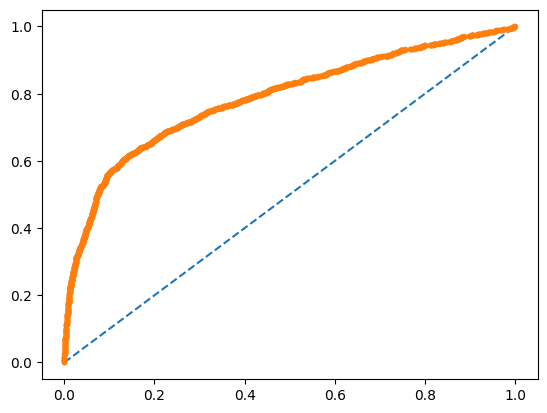

In [141]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Random Forest Classifier

In [142]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

# Training Random Forest Classifier

In [143]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(n_estimators=100)
finalModel_rfc = Convert_Model(X_train,y_train,X_test,y_test,rfc)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.6614583333333334
[[10221   747]
 [ 6728  4384]]
[[10221   747]
 [ 6728  4384]]
0.6614583333333334
0.6614583333333334
0.8544143441824206
0.8544143441824206
0.39452843772498203
0.39452843772498203
f1 score 0.5398017607584806
f1 score 0.5398017607584806


# Testing

AUC: 0.764


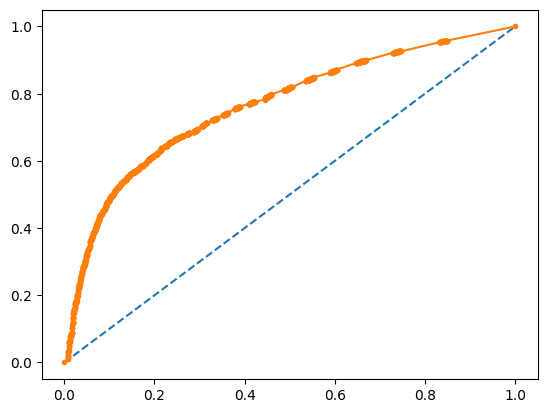

In [144]:

probs = finalModel_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# Feature Importance

In [145]:
data_clean.head()

,age,default,housing,loan,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
39075,0.000000,1,1,1,0.666667,1.0,0.142857,-1,0.083333,0.199532,...,False,False,False,False,False,False,True,False,False,False
34855,0.000000,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False
7107,0.666667,0,-1,1,0.333333,1.0,0.000000,0,0.937500,0.698753,...,False,True,False,False,False,False,False,True,False,False
31614,0.333333,1,1,1,0.000000,1.0,0.142857,-1,0.333333,0.269680,...,False,True,False,False,False,False,False,True,False,False
34878,0.333333,1,1,1,1.000000,1.0,0.000000,0,0.333333,0.269680,...,False,True,False,False,False,True,False,False,False,False


In [146]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [147]:
feature_importances

,importance
euribor3m,0.158044
campaign,0.080383
age,0.071077
nr.employed,0.058139
emp.var.rate,0.050642
housing,0.043565
marital_married,0.031343
cons.conf.idx,0.028490
loan,0.026994
cons.price.idx,0.023721


# SVM Classifier

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Choosing the best parameters for SVM classifier based on 2-fold Cross Validation score

In [149]:

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [150]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2, scoring='precision')


In [151]:
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,clf)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\skl

0.7275699979562641
[[9635 1333]
 [7552 3560]]
[[9635 1333]
 [7552 3560]]
0.5975996376811594
0.5975996376811594
0.7275699979562641
0.7275699979562641
0.320374370050396
0.320374370050396
f1 score 0.4448609809434552
f1 score 0.4448609809434552


In [152]:
print('The best model is: ', finalModel_gb.best_params_)
print('This model produces a mean cross-validated score (precision) of', finalModel_gb.best_score_)

The best model is:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
This model produces a mean cross-validated score (precision) of 0.873650257341892


# Testing

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, finalModel_gb.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)
print("F1 on the evaluation set",f1_1)

precision on the evaluation set:  0.8888888888888888
recall on the evaluation set:  0.0014398848092152627
accuracy on the evaluation set:  0.4973731884057971
F1 on the evaluation set 0.002875112309074573


AUC: 0.501


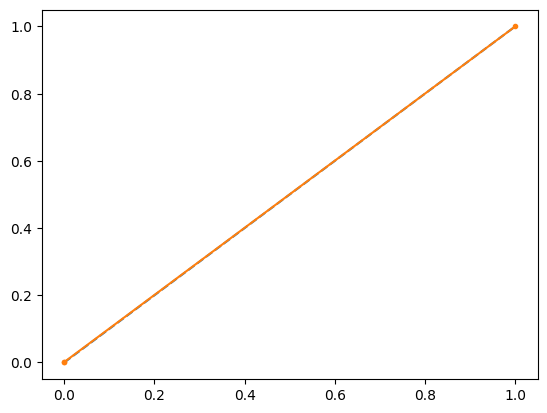

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict(X_test)
# keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


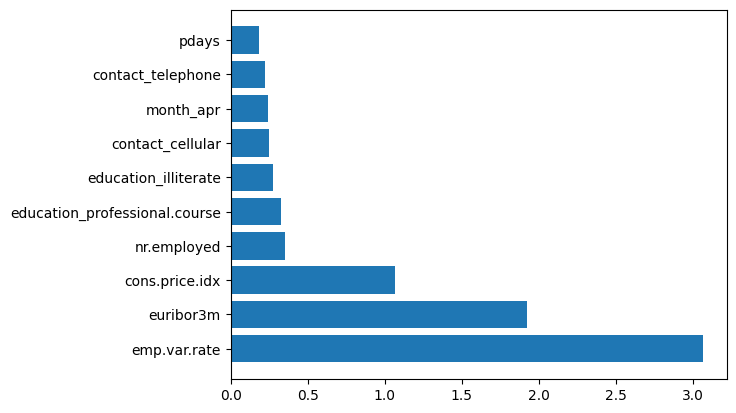

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm
from matplotlib import pyplot as plt
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard teh abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

Reducing Features using PCA

# Classify the model using XGBClassifier

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# fit model no training data
model = XGBClassifier()
finalModel_XGB = Convert_Model(X_train,y_train,X_test,y_test,model)


0.5443840579710145
[[10852   116]
 [ 9944  1168]]
0.5443840579710145
0.9096573208722741
0.10511159107271419
f1 score 0.18844788641497257


AUC: 0.699


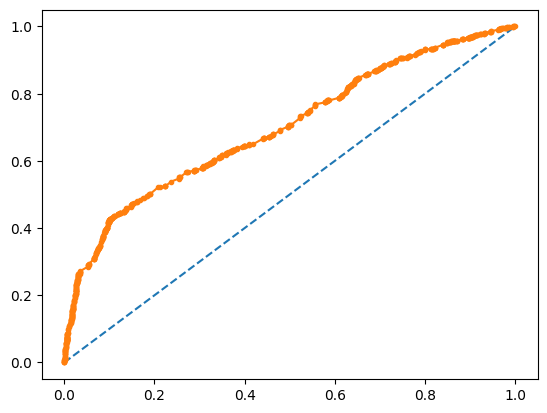

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = finalModel_XGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()


In [ ]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rmodel = XGBClassifier()
rmodel.fit(X_train, y_train)
feature_importances = pd.DataFrame(rmodel.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

,importance
nr.employed,0.553225
month_oct,0.044846
cons.conf.idx,0.036923
cons.price.idx,0.014429
emp.var.rate,0.013788
contact_telephone,0.013317
pdays,0.012386
default,0.011643
poutcome,0.010874
job_student,0.009315


# MLP **Classifier with 3 layer**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=500)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
#print the confusion matrix
print(confusion_matrix(y_test,predictions))

[[10373   595]
 [ 8032  3080]]


In [ ]:
#Print the classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.56      0.95      0.71     10968
           1       0.84      0.28      0.42     11112

    accuracy                           0.61     22080
   macro avg       0.70      0.61      0.56     22080
weighted avg       0.70      0.61      0.56     22080



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,14,15 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.522373188405797
[[9934 1034]
 [9512 1600]]
0.522373188405797
0.6074411541381929
0.14398848092152627
f1 score 0.23279499490760946


AUC: 0.591


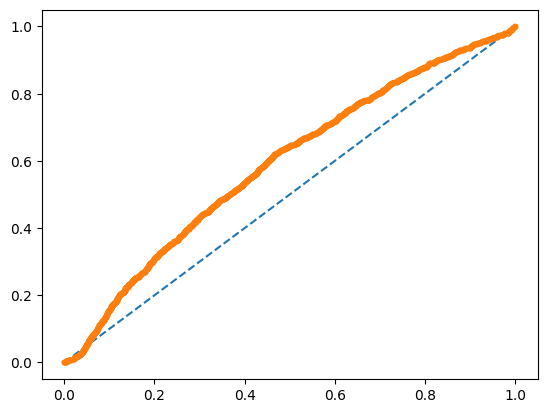

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

#  MLP Classifier with 2 layer

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5453804347826087
[[7130 3838]
 [6200 4912]]
0.5453804347826087
0.5613714285714285
0.44204463642908565
f1 score 0.49461282851676563


AUC: 0.535


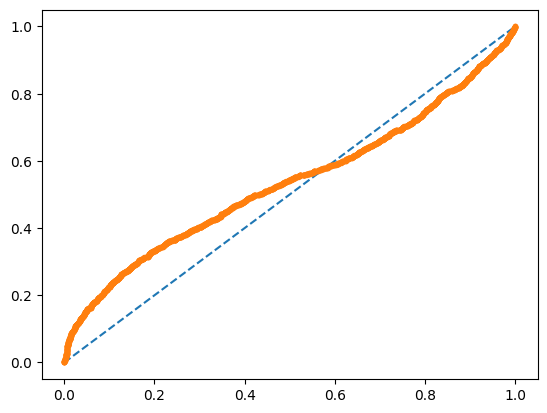

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

# MLP Classifier with 1 layer

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

c:\Users\Jayesh Mahajan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6934782608695652
[[8888 2080]
 [4688 6424]]
0.6934782608695652
0.7554092191909689
0.578113750899928
f1 score 0.6549755301794454


AUC: 0.738


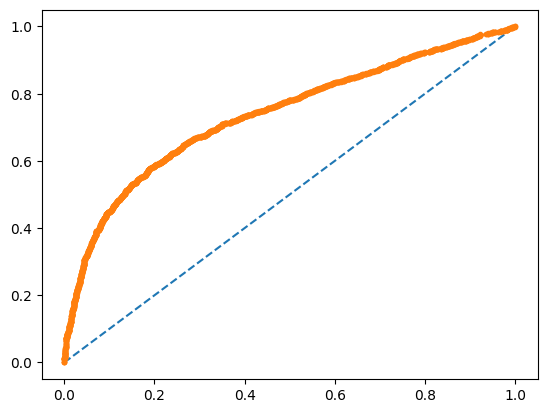

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
#by balcing y output
# After standardization our f1 score and auc percentage increases
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MODEL", "ACCURACY_score","precision_score","Recall_score","F1 score","AUC"]
x.add_row(["Dummy classifer",0.50, 0.50,1,0.66,"NAN"])
x.add_row(["Logistic Regression)", 0.73, 0.80,0.62,0.70,0.78])
x.add_row(["Random Forest",0.65, 0.85,0.38,0.52,0.766])
x.add_row(["SVM classifier",0.73, 0.82,0.60,0.69,0.73])
x.add_row(["XGB boost",0.74, 0.81,0.63,0.71,0.798])
x.add_row(["MLP  classifier with 3 layers",0.70, 0.74,0.61,0.67,0.745])
x.add_row(["MLP classifier with 2 layers",0.70, 0.75,0.61,0.68,0.76])
x.add_row(["MLP classifier 1 layers",0.72, 0.78,0.62,0.693,0.766])

print('Bank Marketing')
print(x)

Bank Marketing
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|             MODEL             | ACCURACY_score | precision_score | Recall_score | F1 score |  AUC  |
+-------------------------------+----------------+-----------------+--------------+----------+-------+
|        Dummy classifer        |      0.5       |       0.5       |      1       |   0.66   |  NAN  |
|      Logistic Regression)     |      0.73      |       0.8       |     0.62     |   0.7    |  0.78 |
|         Random Forest         |      0.65      |       0.85      |     0.38     |   0.52   | 0.766 |
|         SVM classifier        |      0.73      |       0.82      |     0.6      |   0.69   |  0.73 |
|           XGB boost           |      0.74      |       0.81      |     0.63     |   0.71   | 0.798 |
| MLP  classifier with 3 layers |      0.7       |       0.74      |     0.61     |   0.67   | 0.745 |
|  MLP classifier with 2 layers |      0.7       |       0